# Credit EDA Case Study

### Importing Warnings and Necessary Libraries

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Dataset: application_data.csv

* ###  Subtask: Read application_data.csv

In [3]:
app_df = pd.read_csv("application_data.csv")
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- ###  Subtask: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Checking shape of the dataframe
app_df.shape

(307511, 122)

In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Checking summary of the columns
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Preprocessing the application data

In [7]:
# Check the columns having more than 30% NULL values

null_columns = app_df.isnull().sum()
null_columns = null_columns[null_columns.values>(0.3*len(null_columns))]
len(null_columns)

64

In [8]:
# dropping the above identified columns

null_columns = list(null_columns[null_columns.values>=0.3].index)
app_df.drop(labels = null_columns, axis = 1, inplace=True)

In [9]:
# Checking the % of null values in each column

app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


From the above result we can see that there are 0.39% null values in the AMT_ANNUITY column. This column is one of the important columns in our analysis. So, let us replace these null values with the median value, to continue with our analysis. 
As the percentage of null values is very very low, treating them will not have any impact on the data.

In [10]:
# Filling missing values in AMT_ANNUITY with median

val = app_df['AMT_ANNUITY'].median()

app_df.loc[app_df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = val

# Checking the null values in this column

app_df["AMT_ANNUITY"].isnull().sum()

0

There are some columns which have the "XNA" values. that is, "Not Available". Let us now find those columns and perform suitable operations to handle them.

#### Treating "Gender" column

In [11]:
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are only 4 rows in this column whose values are "XNA". AS we can see that females (F) are considerably more in number than males (M), replacing XNA with F will not at all impact our data and analysis.

In [12]:
# Updating the "XNA" rows of column: 'CODE_GENDER' with "F"

app_df.loc[app_df['CODE_GENDER'] == 'XNA','CODE_GENDER'] = 'F'
app_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Treating  "Organization Type" column

In [13]:
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

There are 55374 rows having value as "XNA". This is not a high number considering the number of records in our dataframe.
Let us just rename "XNA" as "Unknown" for this case study.
We are only reporting the null values here. Not replacing them.

*Renaming "XNA" as "Unknown" for better readability*

In [14]:
app_df.loc[app_df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = "Unknown"
app_df["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

* Before we continue with our analysis, let us first all those columns that are irrelevant for us.

In [15]:
#checking the shape of the dataframe
app_df.shape

(307511, 58)

In [16]:
# Dropping unwanted columns from the dataframe.

drop_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
             'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 
             'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
             'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_df.drop(labels = drop_cols, axis = 1, inplace = True)

In [17]:
# checking the dataframe after dropping unwanted columns
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

#### Working on AMT_INCOME_TOTAL

In [18]:
app_df.AMT_INCOME_TOTAL.isnull().sum()

# We found no NULL values inthis column

0

In [19]:
# Checking the column sumary 
app_df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

- We can observe that the difference between "min" and "max" values is very high. So, there may be some outliers in the data.
- Let us plot a boxplot for this column and find out the outliers, if any.

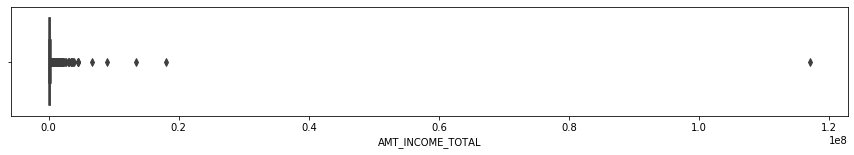

In [20]:
# Checking for outliers

plt.figure(figsize = (15,2))
sns.boxplot(app_df.AMT_INCOME_TOTAL)
plt.show()

- From the above boxplot we can clearly observe that there are outliers in ths AMT_INCOME_TOTAL column.
- We are only reporting the outliers, as of now. Not treating them.

#### Working on AMT_CREDIT

In [21]:
app_df.AMT_CREDIT.isnull().sum()

# we found that there are no null values in this column

0

In [22]:
# Checking column summary
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

- From the above summary, there is a considerable difference between "min" and "max" values. Hence, there may be some outliers in this data.
- Let us now plot a boxplot and analyse the data for outliers.

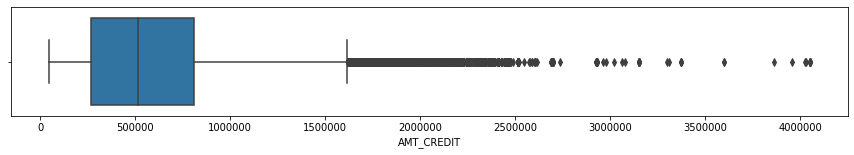

In [23]:
# Checking for outliers

plt.figure(figsize = (15,2))
sns.boxplot(app_df.AMT_CREDIT)
plt.show()

- There are some data points outside the quartile range. These can be treated as outliers.
- We are only reporting these outliers, but not treating them in this analysis.

#### Let us create bins for continuous numeric variable categories columns

In [24]:
# Creating bins for AMT_INCOME_TOTAL column.

income_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 10000000000]
income_slots = ["0-50000","50000-100000","100000-150000","150000-200000","200000-250000","250000-300000","300000-350000",
               "350000-400000","400000-450000","450000-500000","500000 and Above"]

app_df['TOTAL_INCOME'] = pd.cut(app_df['AMT_INCOME_TOTAL'], income_bins, labels = income_slots)

In [25]:
# checking column values after creating bins

app_df.TOTAL_INCOME.value_counts()

100000-150000       91591
150000-200000       64307
50000-100000        59181
200000-250000       48137
250000-300000       17039
300000-350000        8874
350000-400000        5802
400000-450000        4924
0-50000              4517
500000 and Above     2702
450000-500000         437
Name: TOTAL_INCOME, dtype: int64

In [26]:
# Creating bins for AMT_CREDIT column.

credit_bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,
               700000,750000,800000,850000,900000,1000000000]

credit_slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000',
                '400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000',
                '700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']

app_df['CREDIT_RANGE'] = pd.cut(app_df['AMT_CREDIT'], bins = credit_bins, labels = credit_slots)

In [27]:
# Checking column after creating bins
app_df.CREDIT_RANGE.value_counts()

900000 and above    58912
250000-300000       31759
200000-250000       23054
500000-550000       22678
400000-450000       18239
0-150000            18159
150000-200000       17985
300000-350000       16205
650000-700000       15051
450000-500000       13799
750000-800000       12380
800000-850000       11559
550000-600000       11554
850000-900000       10233
350000-400000       10133
600000-650000        8998
700000-750000        6813
Name: CREDIT_RANGE, dtype: int64

### Segmenting data with respect to TARGET variable

The data contains information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. The client with payment difficulties: he/she had done late payment more than X days in at least one of the first Y instalments of the loan in our sample, (TARGET = 1)

2. All other cases: All other cases when the payment is paid on time (TARGET = 0)

Let us now segment our data into two parts based on the value of TARGET variable.

Our aim is to identify the applications:
- which indicate if a client has difficulty in paying their installments which may be used to take necessary actions, and
- ensuring that the customers capable of repaying the loan are not rejected.

In [28]:
# Segmenting the datframe into two dataframes w.r.t TARGET variable

#new dataframe for TARGET = 0
app_t0_df = app_df.loc[app_df["TARGET"] == 0]

# new dataframe for TARGET = 1
app_t1_df = app_df.loc[app_df["TARGET"] == 1]

In [29]:
# checking the newly created dataframes
app_t0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TOTAL_INCOME,CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-100000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,100000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-150000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,16,0,0,0,0,0,0,Other,50000-100000,450000-500000


In [30]:
app_t1_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,TOTAL_INCOME,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-250000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,9,0,0,0,0,0,0,Business Entity Type 3,100000-150000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,9,0,0,0,0,0,0,Business Entity Type 3,200000-250000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,11,0,0,0,0,0,0,Self-employed,100000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,10,0,0,0,0,0,0,Unknown,50000-100000,250000-300000


### Calculating Data Imbalance

In [31]:
# checking TARGET value counts
app_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [32]:
## Since the majority is TARGET = 0 and minority is TARGET = 1;
# the data imbalance ratio is

print("The data imbalance ratio is: ",round(len(app_t0_df)/len(app_t1_df),2))

The data imbalance ratio is:  11.39


# ---------------------------------------------------------------------------------------------------------------

### Univariate Analysis For TARGET = 0 (Clients with no payment difficulties)

#### Finding Ouliers, if any, and reporting them

In [33]:
# Custom function to plot boxplot to check for outliers
def box_plot(df,col,title):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 25
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data = df, x=col,orient='v')
    plt.show()

**Distribution of Income**

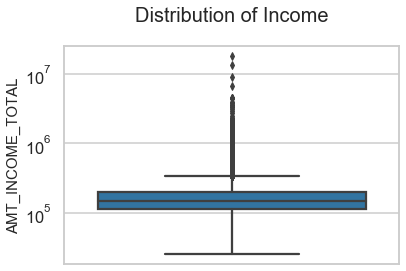

In [34]:
box_plot(app_t0_df, col = 'AMT_INCOME_TOTAL',title = 'Distribution of Income')

Points observed from above plot:
1. There are some data points outside the quartile range. These are the outliers.
2. Very thin third quartile range.

**Distribution of Credit Amount**

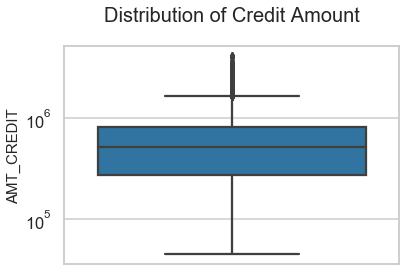

In [35]:
box_plot(app_t0_df, col = 'AMT_CREDIT',title = 'Distribution of Credit Amount')

Inferences:
1. Outliers do exist in this column.
2. Most of the credit values are in the first quartile range, as the first quartile is bigger than the third quartile.

**Distribution of Loan Annuity**

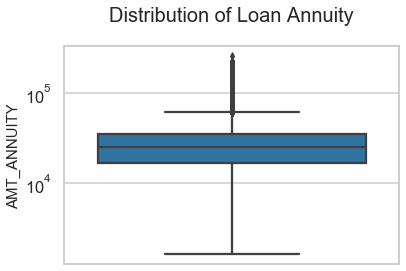

In [36]:
box_plot(app_t0_df, col = 'AMT_ANNUITY',title = 'Distribution of Loan Annuity')

Inferences:
1. Outliers are there in the data.
2. As the first quartile is bigger than the third quartile, most of the clients' annuity fall under the first quartile range.

In [37]:
# Custom function for plotting countplot

def count_plot(df,col,title,hue =None):
    
    sns.set_style('white')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='mako')
    
    plt.show()

#### Analysing Income Range of the clients

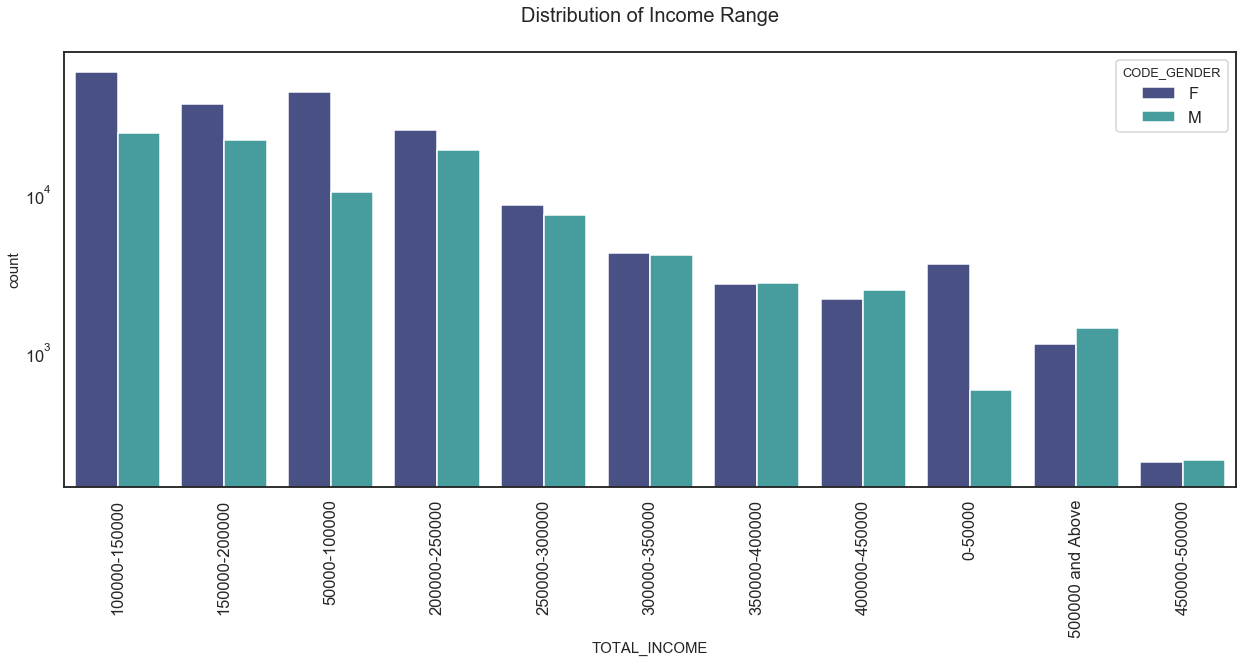

In [38]:
# Plotting for income range

count_plot(app_t0_df, col='TOTAL_INCOME', title='Distribution of Income Range', hue='CODE_GENDER')

Inferences from the above plot:
1. Females outnumbered males for income range 0 to 4,00,000
2. Most number of clients are with in income range of 1,00,000 to 1,50,000. 
3. There are least number of clients with income between 4,50,000 and 5,00,000.

#### Plotting for Credit Amount

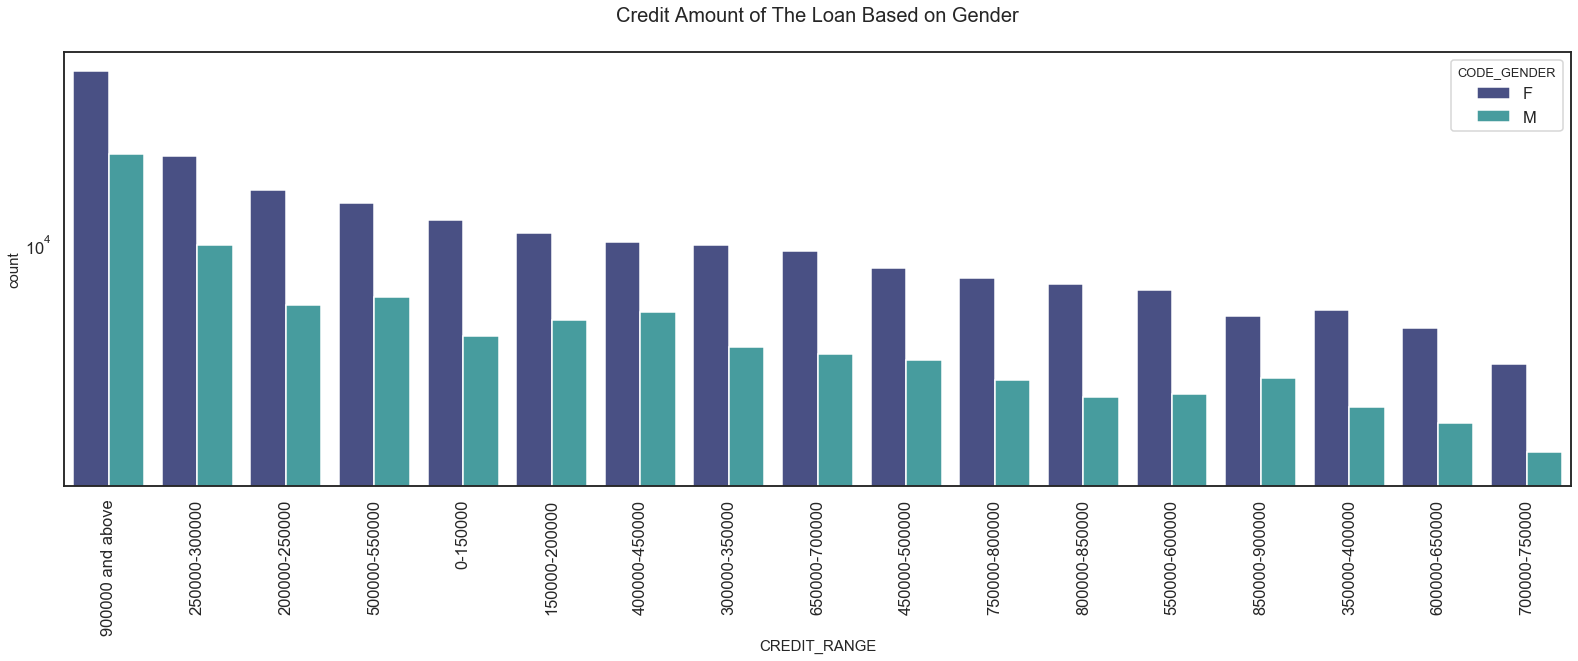

In [40]:
count_plot(app_t0_df, col = 'CREDIT_RANGE', title='Credit Amount of The Loan Based on Gender',hue='CODE_GENDER')

Inferences from the plot:
1. Females are the major credit holders in any given credit amount range.
2. Most of the clients have credit amount 9,00,000 and above.
3. 7,00,000 to 7,50,000 is the range where there are lesser number of clients who have credit.

#### Analysing Clients' payment capabiliites based on the type of their income

In [41]:
# Plotting for NAME_INCOME_TYPE

# categories of clients based ontheir income type
app_t0_df.NAME_INCOME_TYPE.value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

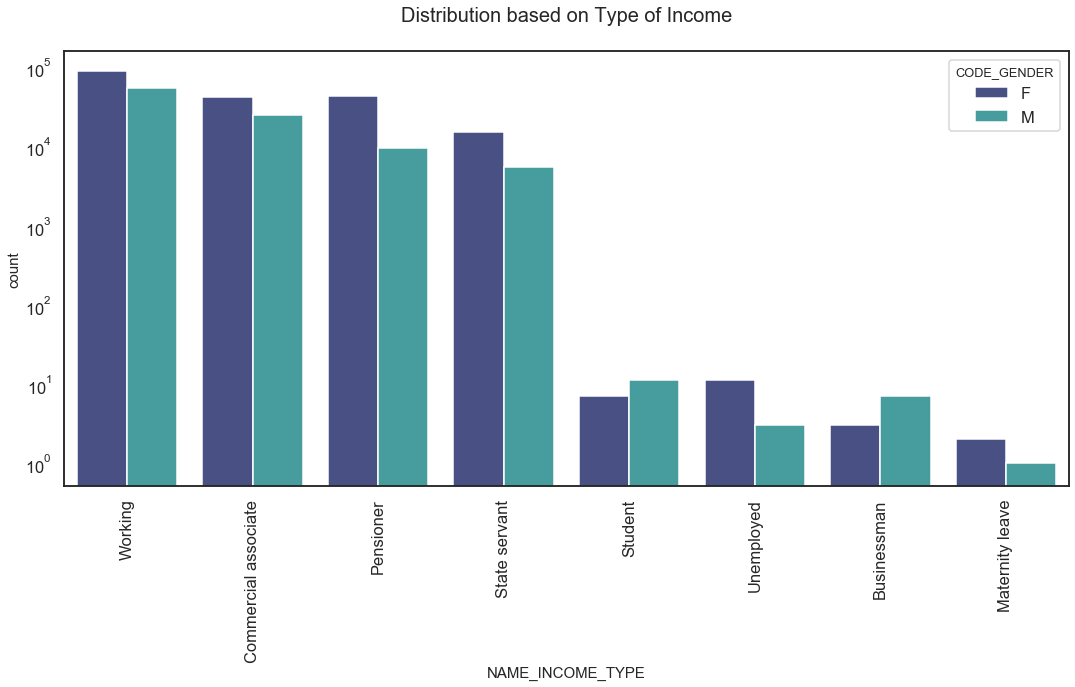

In [42]:
count_plot(app_t0_df, col = 'NAME_INCOME_TYPE', title='Distribution based on Type of Income',hue='CODE_GENDER')

Inferences:
1. Most number of clients who have no payment difficulties are "Working"
2. "Student" and "Businessman" are two segments where male clients are more in number than female clients.
3. Clients drawing income as "Maternity leave" are the least number of clients with no payment difficulties.

#### Analysing Contract Type

In [43]:
# Plotting for NAME_CONTRACT_TYPE

# categories of clients based ontheir income type
app_t0_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

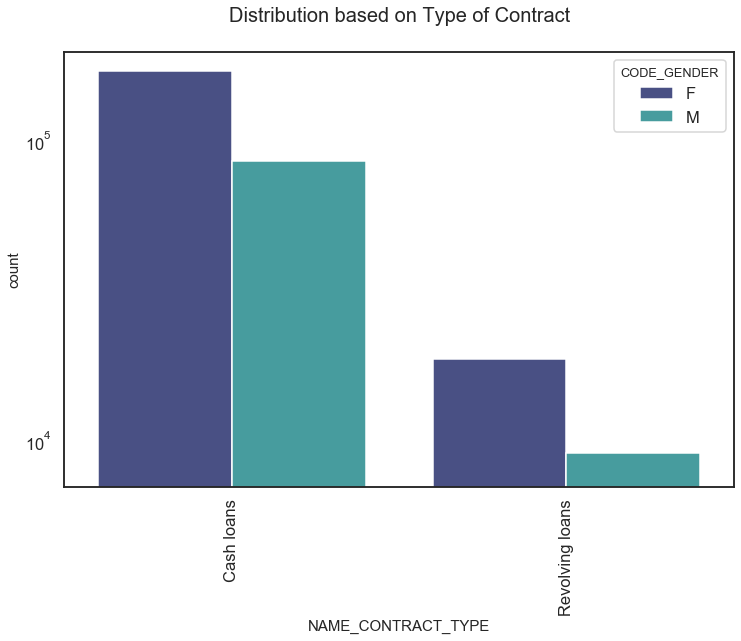

In [44]:
count_plot(app_t0_df, col = 'NAME_CONTRACT_TYPE', title='Distribution based on Type of Contract',hue='CODE_GENDER')

Inferences from above plot:
1. Clients who took "Cash loans" are much more in number than those who took "Revolving loans"
2. In both the cases, females are major clients than males.

#### Analysing based on Client's Education

In [45]:
# Plotting for NAME_EDUCATION_TYPE

# categories of clients based on their income type
app_t0_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

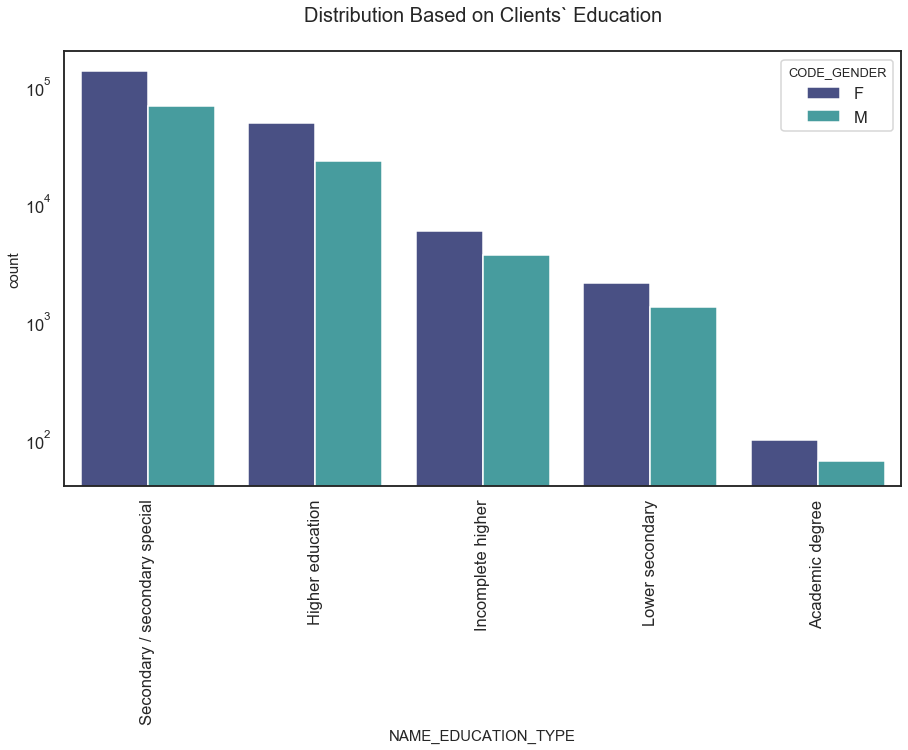

In [46]:
# Plotting count plot to analyse NAME_EDUCATION_TYPE
count_plot(app_t0_df, col = 'NAME_EDUCATION_TYPE', title="Distribution Based on Clients` Education", hue='CODE_GENDER')

Inferences:
1. Clients with "Secondary/ secondary special" education are higher in number who have repaid loan without any difficulties.
2. Least number of clients who have succesfully repaid the loans are those with education type "Academic degree".
3. In any given type of education, females outnumbered male clients.

#### Analysing Clients based on their Organization Type

In [47]:
# Plotting for ORGANIZATION_TYPE

#categories of clients based on their organization type
app_t0_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    61669
Unknown                   52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

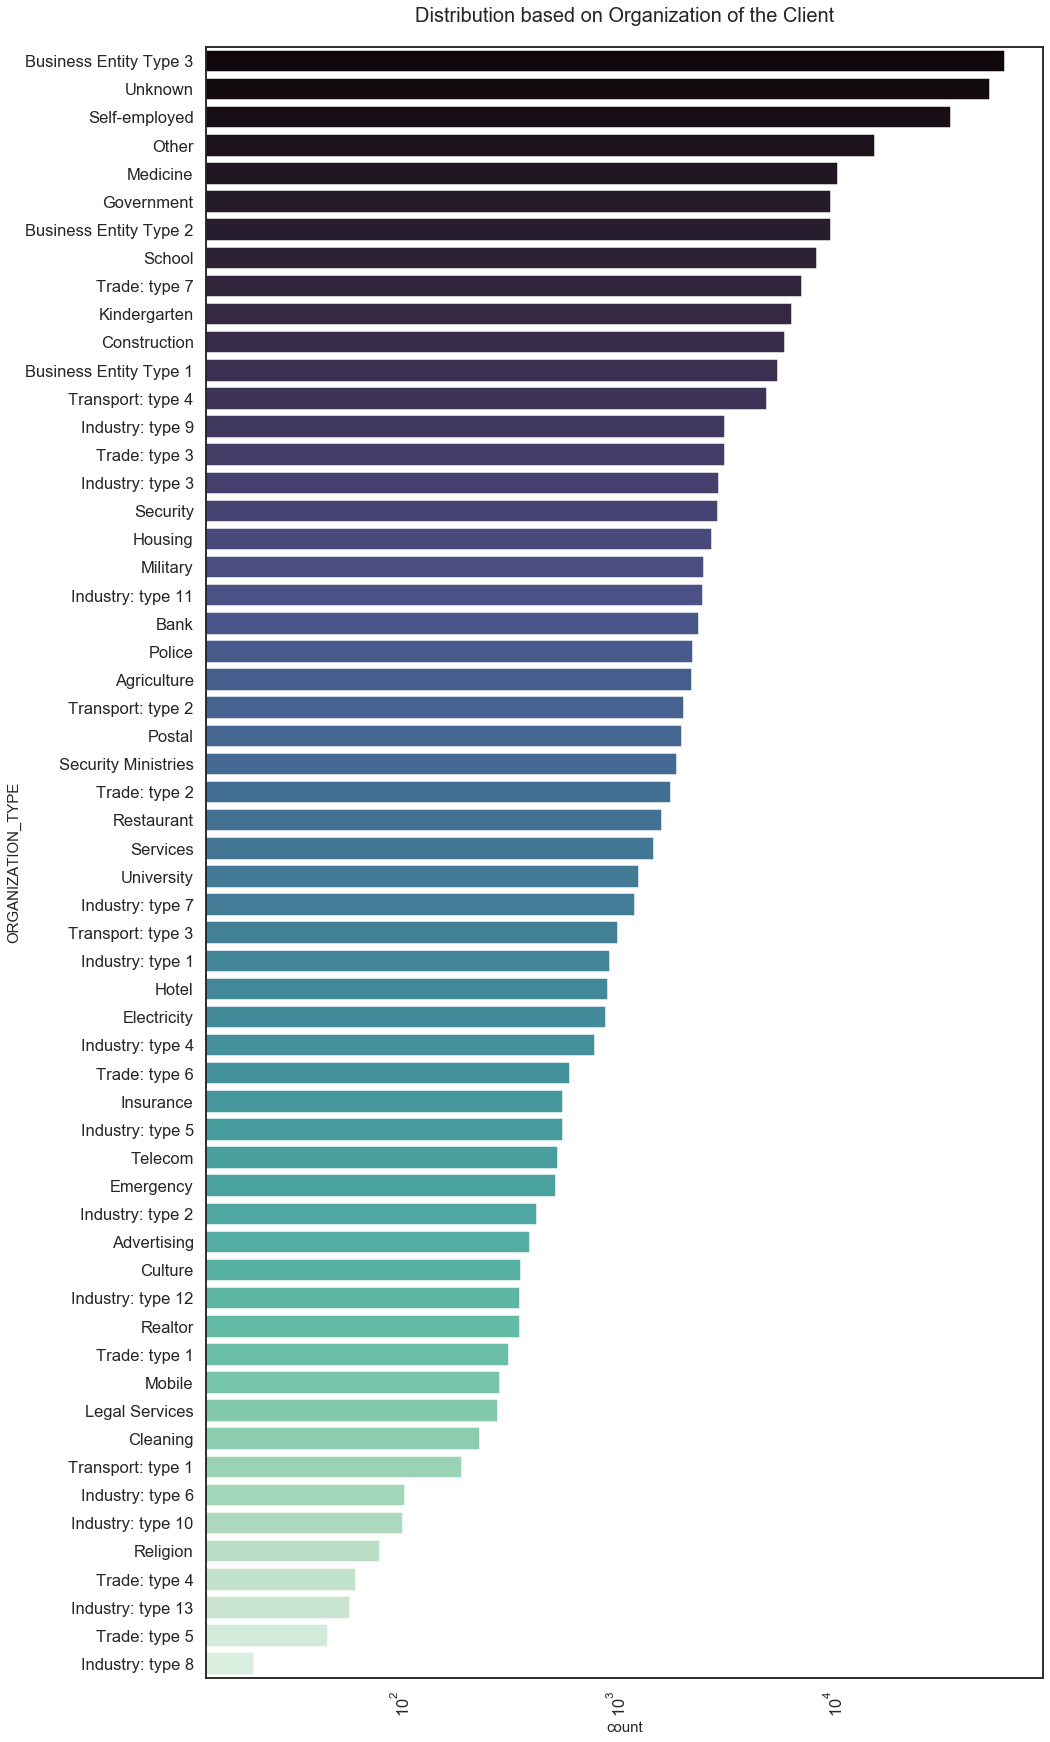

In [48]:
# Plotting countplot for ORGANIZATION_TYPE

sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 25

plt.title("Distribution based on Organization of the Client")

plt.xticks(rotation = 90)
plt.xscale('log')

sns.countplot(data = app_t0_df, y = 'ORGANIZATION_TYPE', order = app_t0_df.ORGANIZATION_TYPE.value_counts().index,
              palette='mako')

plt.show()

Inferences:
1. Clients whose organization is “Business Entity Type 3” constitute more number who are facing payment difficulties.
2. Least are those clients in “Industry: type 8” organization.
3. Clients whose organization details are “Unknown” are second most group of clients with payment difficulties.
4. Clients in organizations “Industry: type 9” and “Trade: type 3” are almost similar in number in this case.

### Univariate Analysis For TARGET = 1 (Clients with payment difficulties)

**Finding Outliers, if any, and reporting them**

In [49]:
# Custom function to plot boxplot to check for outliers
def box_plot2(df,col,title):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 25
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data = df, x = col, orient='v')
    plt.show()

**For Income Amount**

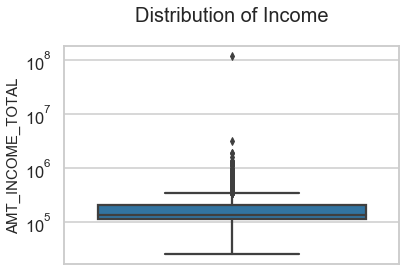

In [50]:
box_plot2(app_t1_df, col = 'AMT_INCOME_TOTAL',title = 'Distribution of Income')

Inferences:
1. Some outliers are present in the data
2. Most of the clients' income fall in the first quartile range.
2. Lesser third quartile region indicating lesser number of clients with income in that region.

**For Credit Amount**

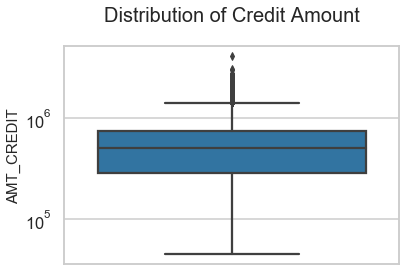

In [51]:
box_plot2(app_t1_df, col = 'AMT_CREDIT',title = 'Distribution of Credit Amount')

Inferences:
1. Most of the credit amounts are in first quartile range, as it is larger here than the third quartile range.
2. Outliers are present in this data

**For Loan Annuity**

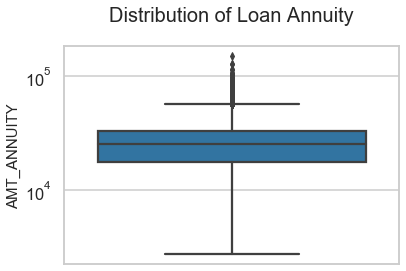

In [52]:
box_plot2(app_t1_df, col = 'AMT_ANNUITY',title = 'Distribution of Loan Annuity')

Inferences:
1. There are data points outside the interquartile range. These are the outliers.
2. Most of the data is with in the first quartile than the third quartile.

In [53]:
# Custom function for plotting countplot

def count_plot2(df,col,title,hue =None):
    
    sns.set_style('white')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma')
    
    plt.show()

#### Analysing Income Range of the Clients

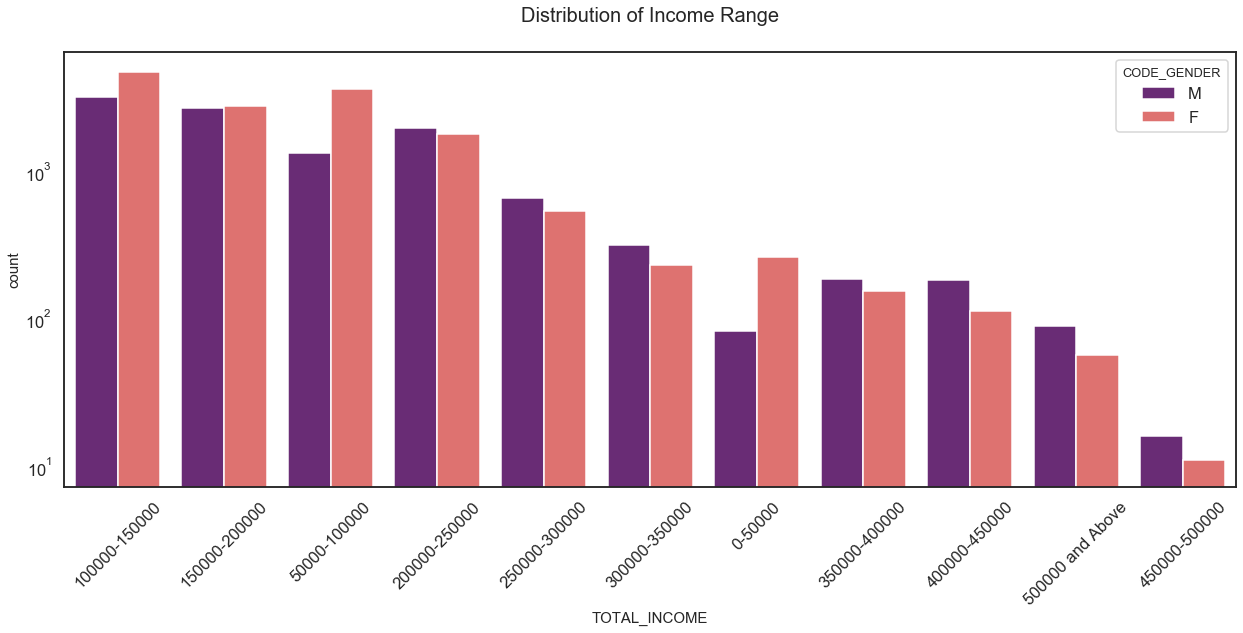

In [54]:
# Plotting for income range

count_plot2(app_t1_df, col = "TOTAL_INCOME", title = "Distribution of Income Range", hue = "CODE_GENDER")

Inferences:
1. From Income above 2,00,000 male clients outnumbered female clients.
2. 1,00,000 to 1,50,000 constitute more number of clients who have payment difficulties.
3. Least number of repayment difficulties are observed between 4,50,000 to 5,00,000 income range.

#### Plotting for Credit Amount

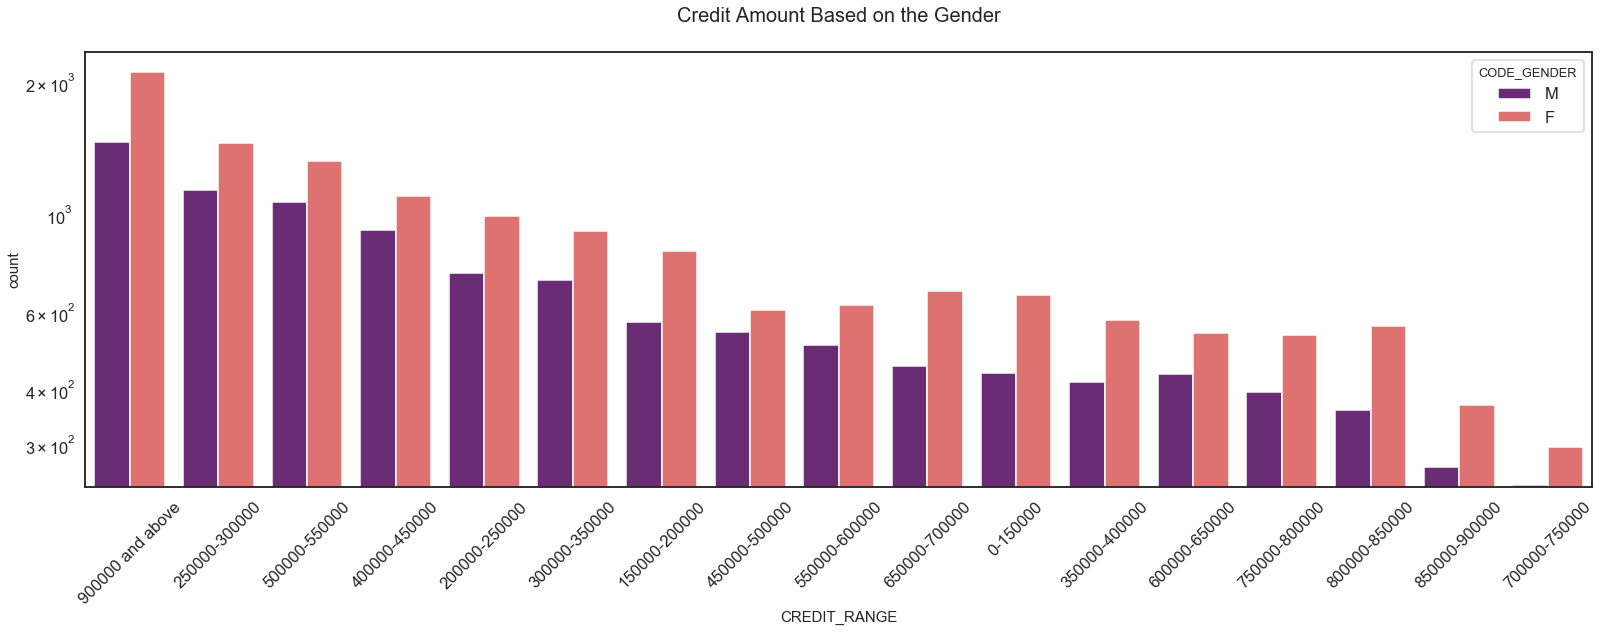

In [55]:
# Plotting for credit amount

count_plot2(app_t1_df, col = "CREDIT_RANGE", title = "Credit Amount Based on the Gender", hue = "CODE_GENDER")

Inferences from the plot:
1. The number of female clients are higher than males irrespective of the credit ranges.
2. Most number of clients with payment difficulties fall in the credit range 9,00,000 and above.
3. Credit range 7,00,000 to 7,50,000 have least number of clients with difficulties in repaying loans and the male clients in this range are almost negligible.

#### Analysing Clients' payment difficulties based on the type of their Income

In [56]:
# Plotting for NAME_INCOME_TYPE

#categories of clients based on their income type
app_t1_df.NAME_INCOME_TYPE.value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

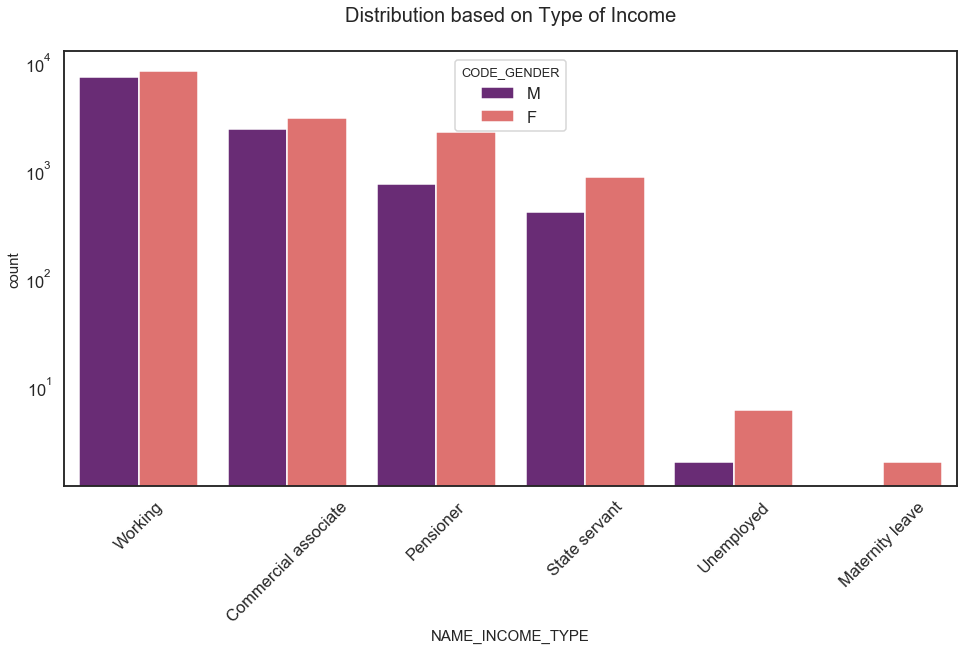

In [57]:
# plotting for income type
count_plot2(app_t1_df, col = "NAME_INCOME_TYPE", title = "Distribution based on Type of Income", hue = "CODE_GENDER")

Inferences:
1. Female clients outnumbered male clients
2. "Working" clients consists of more clients with payment difficulties.
3. There are only female clients who have income from "Maternity leave" and are facing difficulty in repaying loans.

#### Analysing Contract Type

In [58]:
# Plotting for NAME_CONTRACT_TYPE

#categories of clients based on their income type
app_t1_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

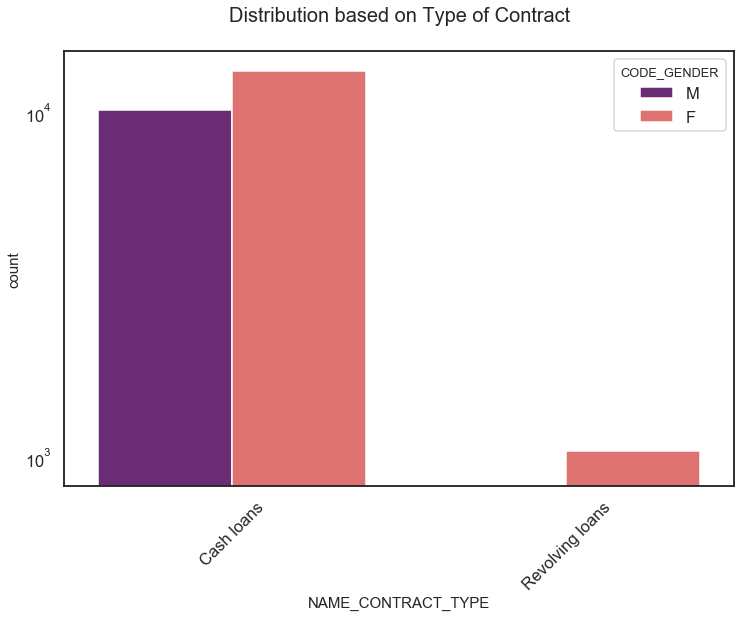

In [59]:
# plotting for contract type

count_plot2(app_t1_df, col = "NAME_CONTRACT_TYPE", title = "Distribution based on Type of Contract", hue = "CODE_GENDER")

Inferences:
1. "Cash loans" contain most number of clients with payment difficulties.
2. Clients faccing payment difficulties having taken "Revolving loans" are very less in number and constitute only females.

#### Analysing based on Education of Client

In [60]:
# Plotting for NAME_EDUCATION_TYPE

#categories of clients based on their income type
app_t1_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

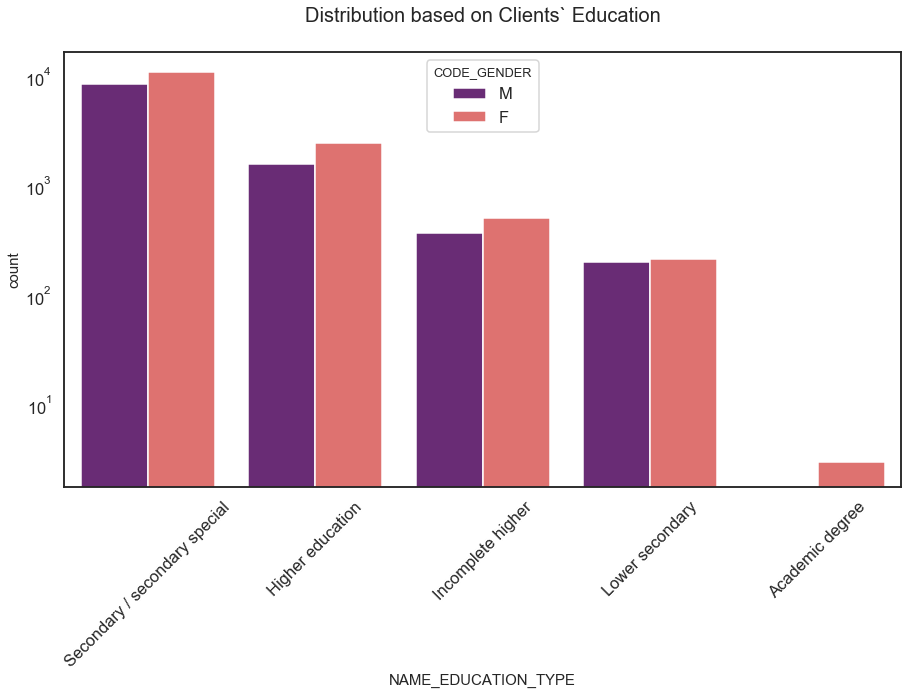

In [61]:
# plotting for education type

count_plot2(app_t1_df, col = "NAME_EDUCATION_TYPE", title = "Distribution based on Clients` Education", hue = "CODE_GENDER")

Inferences from above plot:
1. Clients with "Secondary/ secondary special" education are more in number, who have taken credits and facing payment difficulties.
2. "Academic degree" holders are least in number and constitute only female clients.
3. For "Lower secondary" education category, there is no gignificant difference between number of female and male clients.

#### Analysing Clients based on their Organization

In [62]:
# Plotting for ORGANIZATION_TYPE

#categories of clients based on their organization type
app_t1_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    6323
Self-employed             3908
Unknown                   2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

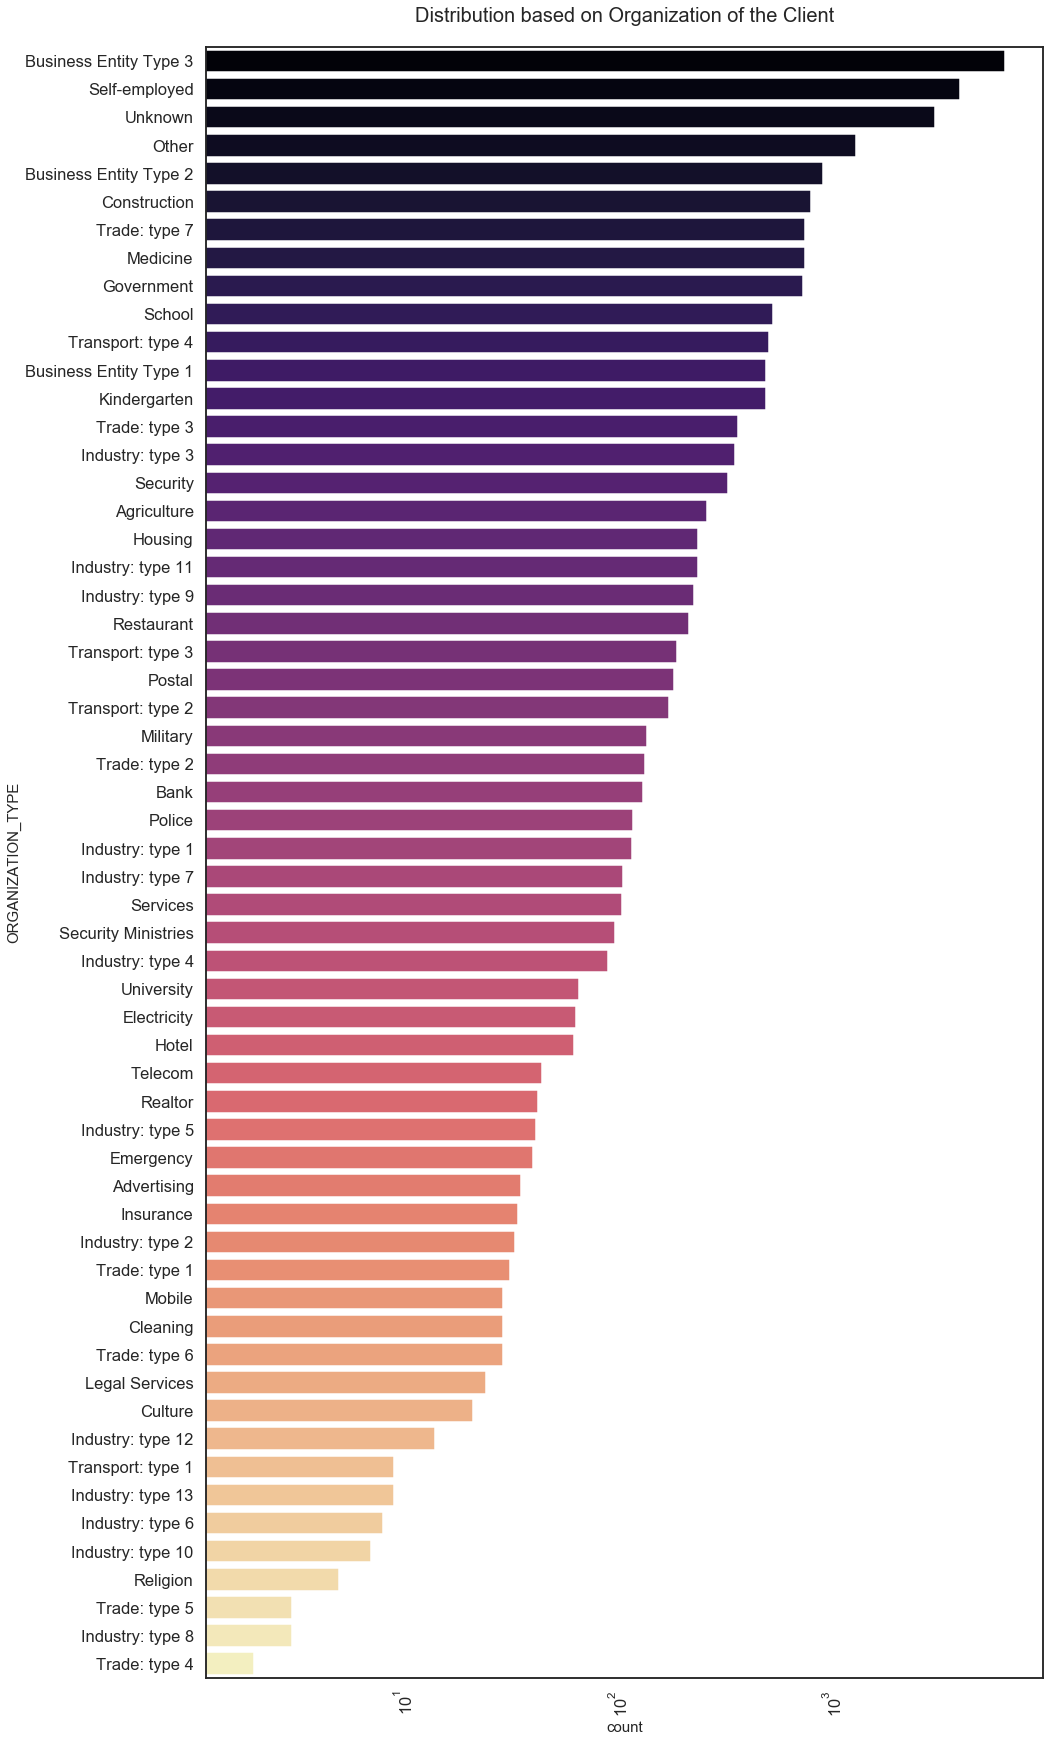

In [63]:
# Plotting countplot for ORGANIZATION_TYPE

sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 25

plt.title("Distribution based on Organization of the Client")

plt.xticks(rotation = 90)
plt.xscale('log')

sns.countplot(data = app_t1_df, y = 'ORGANIZATION_TYPE', order = app_t1_df.ORGANIZATION_TYPE.value_counts().index,
              palette='magma')

plt.show()

Inferences:
1. Clients whose organization is “Business Entity Type 3” constitute more number who are facing payment difficulties.
2. Least are those clients in “Trade: type 4” organization.
3. Clients whose organization details are “Unknown” are third most group of clients with payment difficulties.

### Finding Correlation between numerical columns for TARGET = 0 and TARGET = 1

In [64]:
app_t0_corr = app_t0_df.iloc[0:,2:]
app_t1_corr = app_t1_df.iloc[0:,2:]

corr_t0 = app_t0_corr.corr(method='spearman')
corr_t1 = app_t1_corr.corr(method='spearman')


**Correlation Matrix for TARGET 0**

In [65]:
corr_t0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.025551,0.375639,-0.161230,0.180517,-0.019986,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.097772,0.093515,-0.174540,0.076387,0.035931,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.053570,-0.057151,-0.120400,0.009416,-0.001982,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.058591,0.011740,-0.129773,0.037717,0.016570,0.054189,0.035819,0.075773,0.073042,-0.004962,0.009718,0.019451
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,1.000000,-0.030730,-0.002577,-0.036684,-0.010463,0.128237,-0.019922,0.029206,0.051195,-0.045545,-0.029350,-0.005476
DAYS_BIRTH,0.375639,0.093515,-0.057151,0.011740,-0.030730,1.000000,-0.234168,0.298130,0.261979,0.098444,0.066377,0.096421,0.070065,0.180952,0.239113,0.156588
DAYS_EMPLOYED,-0.161230,-0.174540,-0.120400,-0.129773,-0.002577,-0.234168,1.000000,-0.037302,-0.117617,-0.049101,0.021749,-0.010349,-0.019504,0.022427,-0.083228,-0.098678
DAYS_REGISTRATION,0.180517,0.076387,0.009416,0.037717,-0.036684,0.298130,-0.037302,1.000000,0.094153,-0.008471,0.025938,0.032723,0.024163,0.055307,0.085865,0.062442
DAYS_ID_PUBLISH,-0.019986,0.035931,-0.001982,0.016570,-0.010463,0.261979,-0.117617,0.094153,1.000000,0.039755,0.035392,0.049195,0.034776,0.077360,0.101050,0.062976
HOUR_APPR_PROCESS_START,0.001725,0.102384,0.051370,0.054189,0.128237,0.098444,-0.049101,-0.008471,0.039755,1.000000,0.052053,0.071837,0.058612,0.019765,0.020448,0.012789


**Top 10 Correlations for Target = 0**

1. LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION: 0.861861
2. AMT_ANNUITY & AMT_CREDIT: 0.831885
3. LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY: 0.830381
4. AMT_ANNIUTY & AMT_INCOME_TOTAL: 0.485689
5. REG_REGION_NOT_WORK_REGION & REG_REGION_NOT_LIVE_REGION: 0.446101
6. REG_CITY_NOT_WORK_CITY & REG_CITY_NOT_LIVE_CITY: 0.435514
7. AMT_CREDIT & AMT_INCOME_TOTAL: 0.41607
8. DAYS_BIRTH & CNT_CHILDREN: 0.375639
9. REG_CITY_NOT_LIVE_CITY & REG_REGION_NOT_LIVE_REGION: 0.341571
10. DAYS_REGISTRATION & DAYS_BIRTH: 0.298130

**Correlation Matrix for TARGET 1**

In [66]:
corr_t1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.031628,0.267862,-0.116332,0.133658,-0.027320,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.051463,-0.007238,-0.117761,0.036671,-0.005929,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.039919,-0.155216,-0.083601,-0.017099,-0.053780,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.023297,-0.030483,-0.096587,0.035900,-0.014472,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,1.000000,-0.046398,-0.003635,-0.034315,-0.023668,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447
DAYS_BIRTH,0.267862,-0.007238,-0.155216,-0.030483,-0.046398,1.000000,-0.107174,0.232940,0.251626,0.065810,0.055835,0.064540,0.039911,0.165372,0.203415,0.108966
DAYS_EMPLOYED,-0.116332,-0.117761,-0.083601,-0.096587,-0.003635,-0.107174,1.000000,-0.017716,-0.049799,-0.027246,0.037032,0.016830,0.002150,0.046567,-0.025656,-0.055327
DAYS_REGISTRATION,0.133658,0.036671,-0.017099,0.035900,-0.034315,0.232940,-0.017716,1.000000,0.095750,-0.032019,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747
DAYS_ID_PUBLISH,-0.027320,-0.005929,-0.053780,-0.014472,-0.023668,0.251626,-0.049799,0.095750,1.000000,0.026347,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407
HOUR_APPR_PROCESS_START,-0.022469,0.088174,0.028537,0.032083,0.105989,0.065810,-0.027246,-0.032019,0.026347,1.000000,0.048070,0.065472,0.052126,0.007850,0.019658,0.014637


**Top 10 Correlations For TARGET = 1**

1. LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION: 0.847885
2. AMT_ANNUITY & AMT_CREDIT: 0.811443
3. LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY: 0.778540
4. REG_REGION_NOT_WORK_REGION & REG_REGION_NOT_LIVE_REGION: 0.497937
5. REG_CITY_NOT_WORK_CITY & REG_CITY_NOT_LIVE_CITY: 0.472052
6. AMT_ANNUITY & AMT_INCOME_TOTAL: 0.431617
7. AMT_CREDIT & AMT_INCOME_TOTAL: 0.359276
8. REG_CITY_NOT_LIVE_CITY & REG_REGION_NOT_LIVE_REGION: 0.322628
9. DAYS_BIRTH & CNT_CHILDREN: 0.267862
10. DAYS_ID_PUBLISH & DAYS_BIRTH: 0.251626 

* We know that visualizing the correlation between the numeric variables can be best done by plotting Heat maps.Let us now plot heat maps and visualize the data.

**Plotting heat map for TARGET = 0**

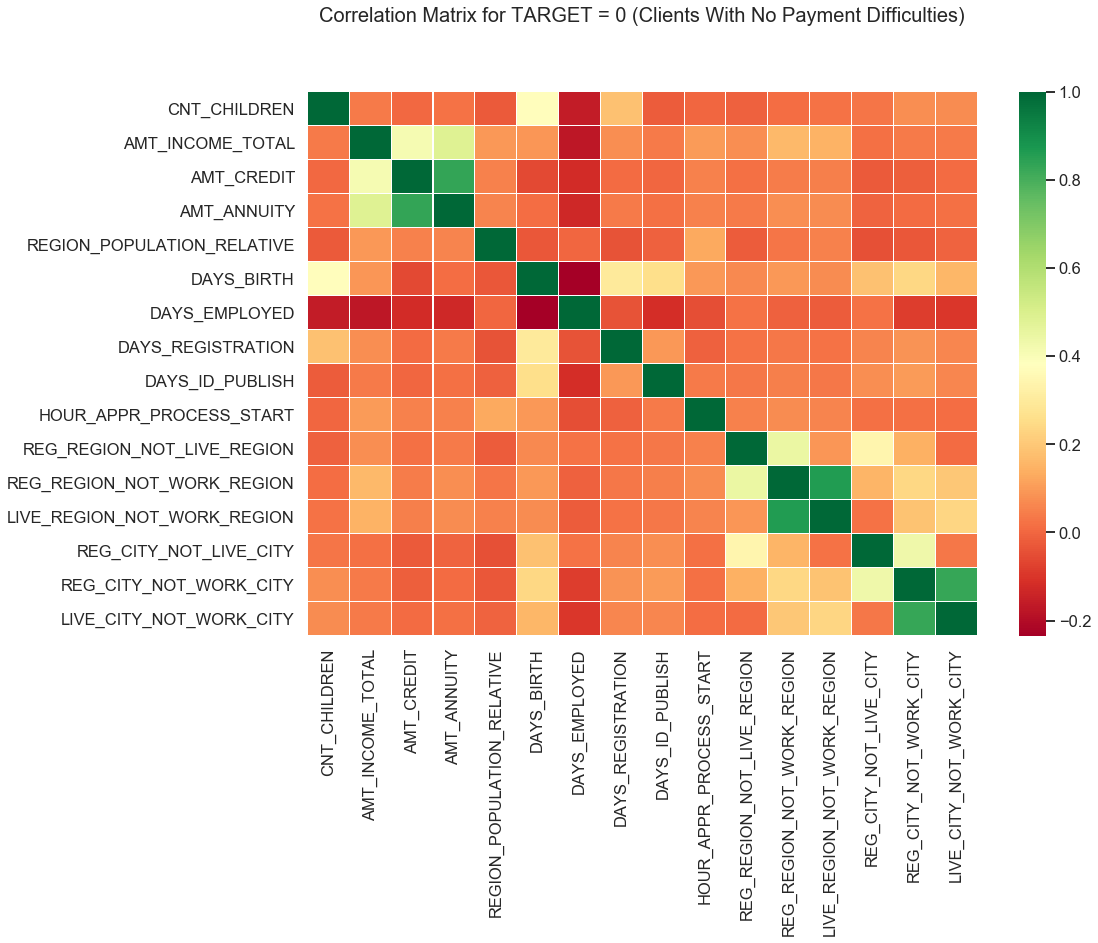

In [67]:
plt.figure(figsize = (15, 10))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 70
    
sns.heatmap(corr_t0, cmap="RdYlGn", annot = False, linewidths = 0.1)

plt.title("Correlation Matrix for TARGET = 0 (Clients With No Payment Difficulties)")
plt.yticks(rotation = 0)
plt.show()

Inferences drawn from the above plot:

1. Strong correlation between AMT_ANNUITY and AMT_CREDIT. That is, higher the loan credit amount, higher is the loan annuity.
2. Credit amount and number of children for the client are inversely proportional. Higher the number of children to the client, lower is the credit amount and vice-versa.
3. Higher the number of days the client is employed in the current employment at the time of taking loan, lower is the loan annuity and vice-versa.
4. Lower correlation between credit amount and date of birth indicates that, Higher the age of client , lower is the credit amount and vice-versa.
5. Lesser correlation between client’s total income and his number of children. That is, lower the number of children to the client, higher is his total income and vice-versa.
6. Similarly, lower correlation between client’s loan annuity and the number of children. Higher the number of children to the client, lower is the loan annuity and vice-versa.
7. Correlation between client’s residence address and population density of that region is not very high. This cannot be considered as a major factor effecting the payment capability of client.

**Plotting heat map for TARGET = 1**

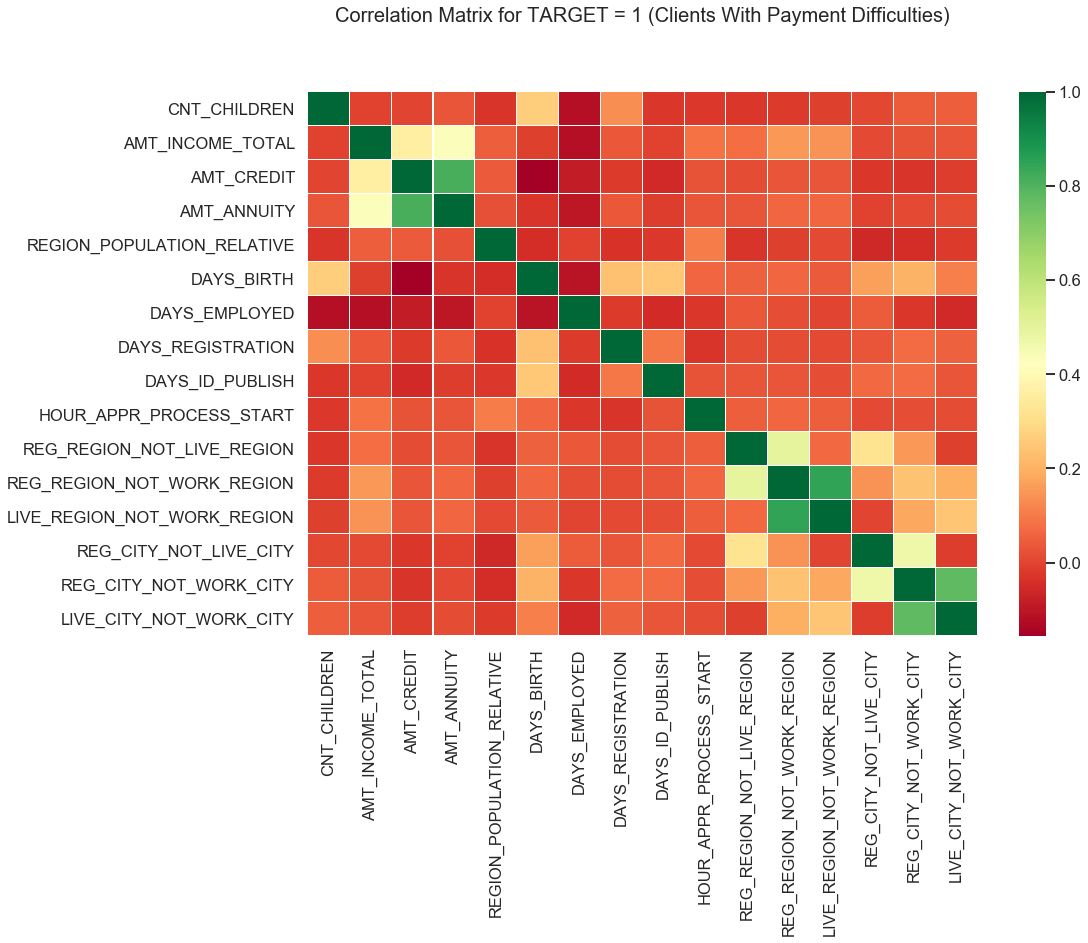

In [68]:
plt.figure(figsize = (15, 10))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 70
    
sns.heatmap(corr_t1, cmap="RdYlGn", annot = False, linewidths = 0.1)

plt.title("Correlation Matrix for TARGET = 1 (Clients With Payment Difficulties)")
plt.yticks(rotation = 0)
plt.show()

*For the clients with payment difficulties (TARGET = 1), the correlation between variables is almost similar to those of TARGET 0 i.e., clients with no payment difficulties, except slight change in the correlation values.*

1. Strong correlation between AMT_ANNUITY and AMT_CREDIT. That is, higher the loan credit amount, higher is the loan annuity.
2. Credit amount and number of children for the client are inversely proportional. Higher the number of children to the client, lower is the credit amount and vice-versa.
3. Higher the number of days the client is employed in the current employment at the time of taking loan, lower is the loan annuity and vice-versa.
4. Lower correlation between credit amount and date of birth indicates that, Higher the age of client , lower is the credit amount and vice-versa.
5. Lesser correlation between client’s total income and his number of children. That is, lower the number of children to the client, higher is his total income and vice-versa.
6. Similarly, lower correlation between client’s loan annuity and the number of children. Higher the number of children to the client, lower is the loan annuity and vice-versa.
7. Correlation between client’s residence address and population density of that region is not very high. This cannot be considered as a major factor effecting the payment capability of client.

# ---------------------------------------------------------------------------------------------------------------

### Bivariate Analysis For TARGET = 0 (Clients With No Payment Difficulties)

*(Family status marked as "Unknown" in the below 4 box plots are actually the NULL values that are present in the data. These "XNA"s are renamed as "Unknown" for better readability. This was also mentioned in the earlier part of the analysis. As per the coding guidelines, we are only reporting them. But not replacing/ deleting them.)*

**Analysing Credit Amount Against Type Of Education Of The Client**

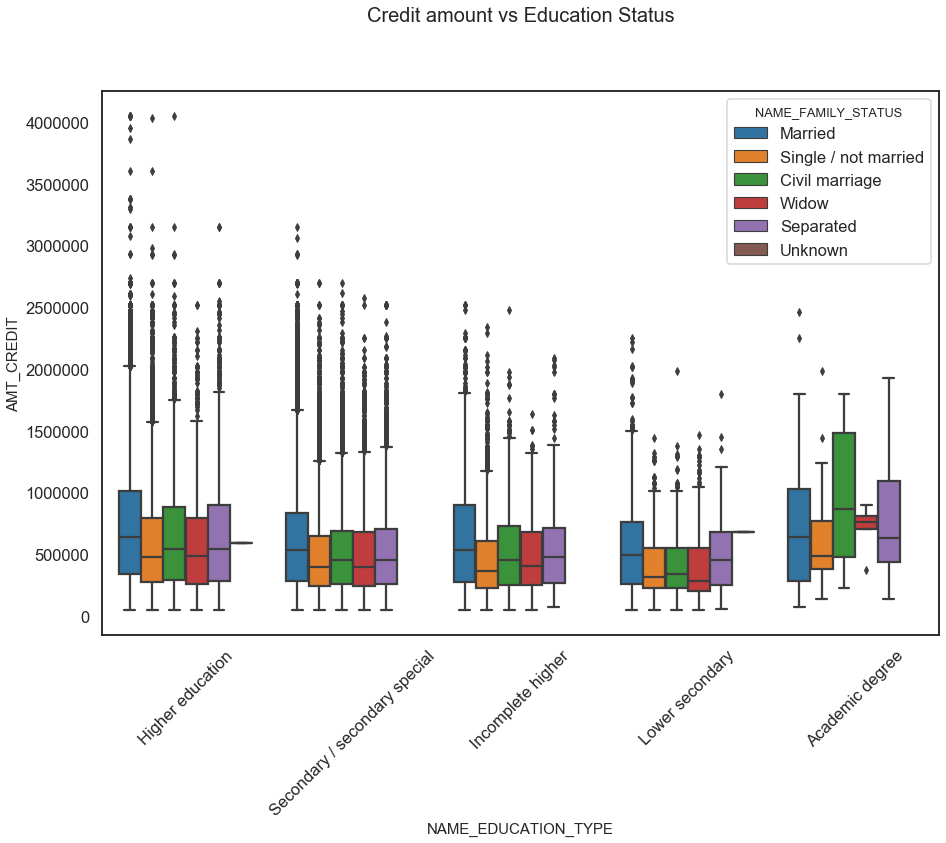

In [69]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45)

sns.boxplot(data = app_t0_df, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Credit amount vs Education Status')

plt.show()

*The above boxplot is plotted as per the family status of the client*

Inferences from the plot:
1. In "Higher education"
    - Outliers in the data are too high.
    - More Credit amount is for the clients having family status "Married", "Civil Marriage" or "Separated".
2. In "Secondary/ secondary special" education:
    - Outliers in the data are low compared to those in "Higher education". But still their number is considerably high.
    - "Married" clients have higher Credit amount.
3. "Single/ not married" clients with "incomplete higher" education have higher credit amount.
4. Credit amount for clients with "Lower secondary" education are lowest of all the categories of clients.
5. For clients with education "Academic degree"
    - there are NO outliers in clients with family status "Civil marriage", "widow", and "Separated".
    - "Widow" clients have least number of Credit amounts.

#### Analysing Income Against Type Of Education Of The Client

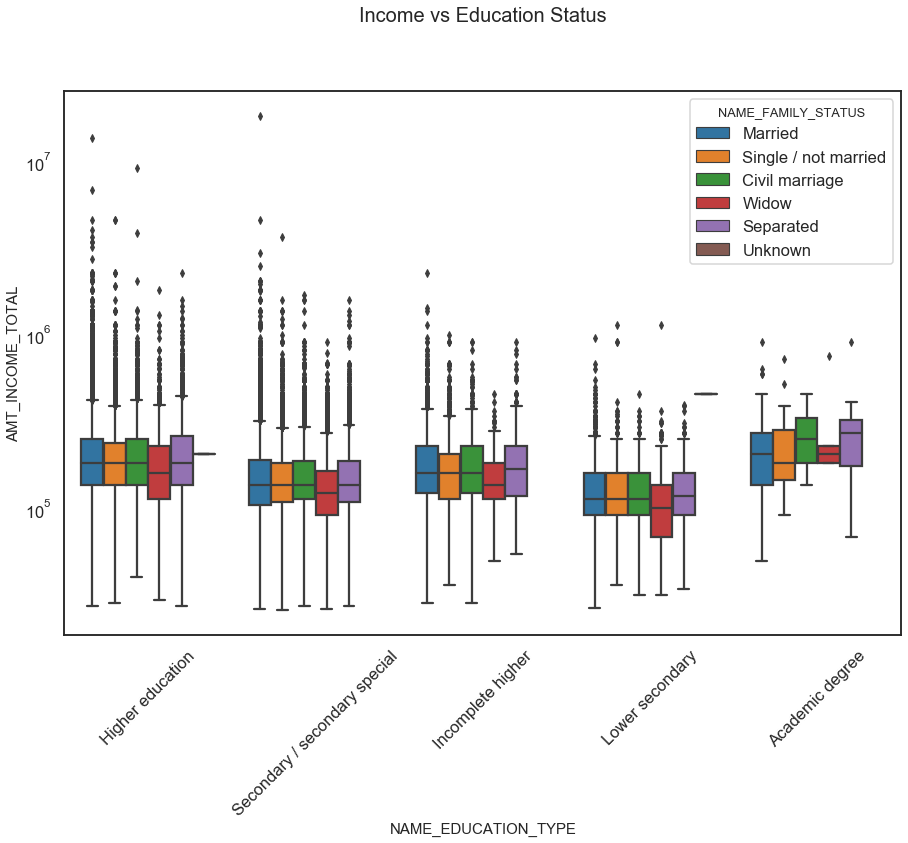

In [70]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45)
plt.yscale('log')

sns.boxplot(data = app_t0_df, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income vs Education Status')

plt.show()

*Plotted as per family status of the clients.*

Inferences from the above boxplot:
1. Outliers in total income of client are present in almost all categories of education.
2. In all education types, most of the clients are in the first quartile range of the total income.
3. Income is more for the clients with "Higher education".
4. The trend in income range of clients with "Secondary/ secondary special" education are similar to those of "Higher Education".

### Bivariate Analysis For TARGET = 1 (Clients With Payment Difficulties)

**Analysing Credit Amount Against Type Of Education Of The Client**

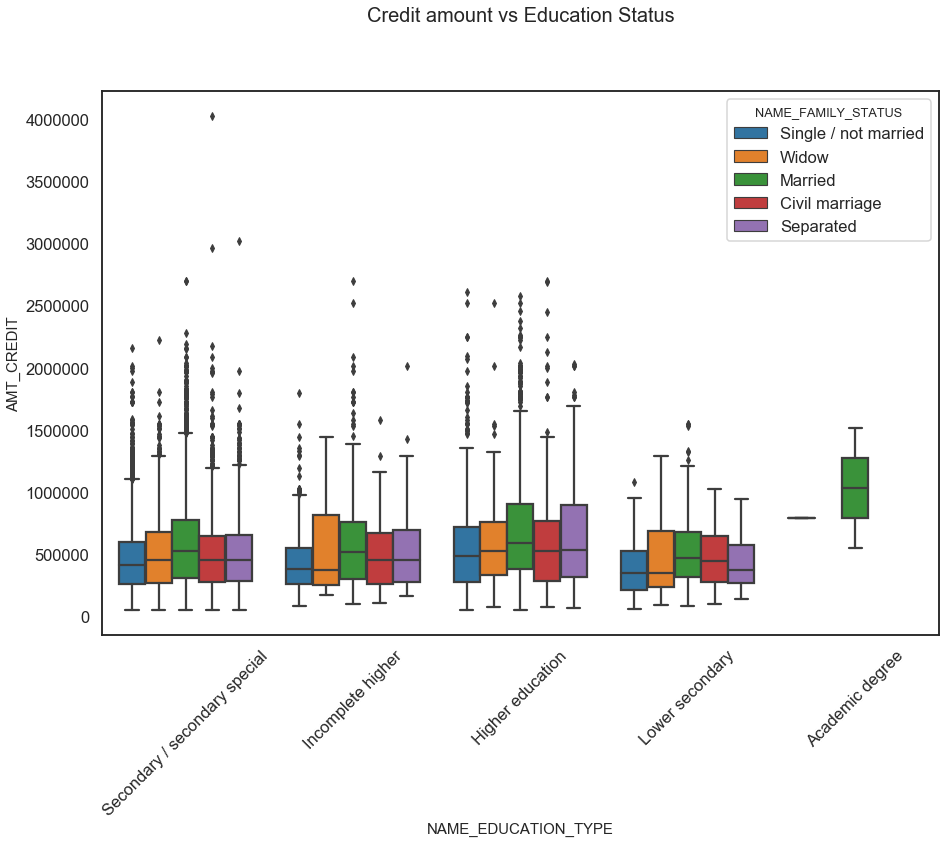

In [71]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 45)

sns.boxplot(data = app_t1_df, x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Credit amount vs Education Status')

plt.show()

The inferences here for clients with payment difficulties are similar to the inferences for clients without payment difficulties.

1. In "Higher education"
    - Outliers in the data are too high.
    - More Credit amount is for the clients having family status "Married", "Civil Marriage" or "Separated".
2. In "Secondary/ secondary special" education:
    - Outliers in the data are low compared to those in "Higher education". But still their number is considerably high.
    - "Married" clients have higher Credit amount.
3. "Single/ not married" clients with "incomplete higher" education have higher credit amount.
4. Credit amount for clients with "Lower secondary" education are lowest of all the categories of clients.
5. For clients with education "Academic degree"
    - there are NO outliers in clients with family status "Civil marriage", "widow", and "Separated".
    - "Widow" clients have least number of Credit amounts.

#### Analysing Income Against Type Of Education Of The Client

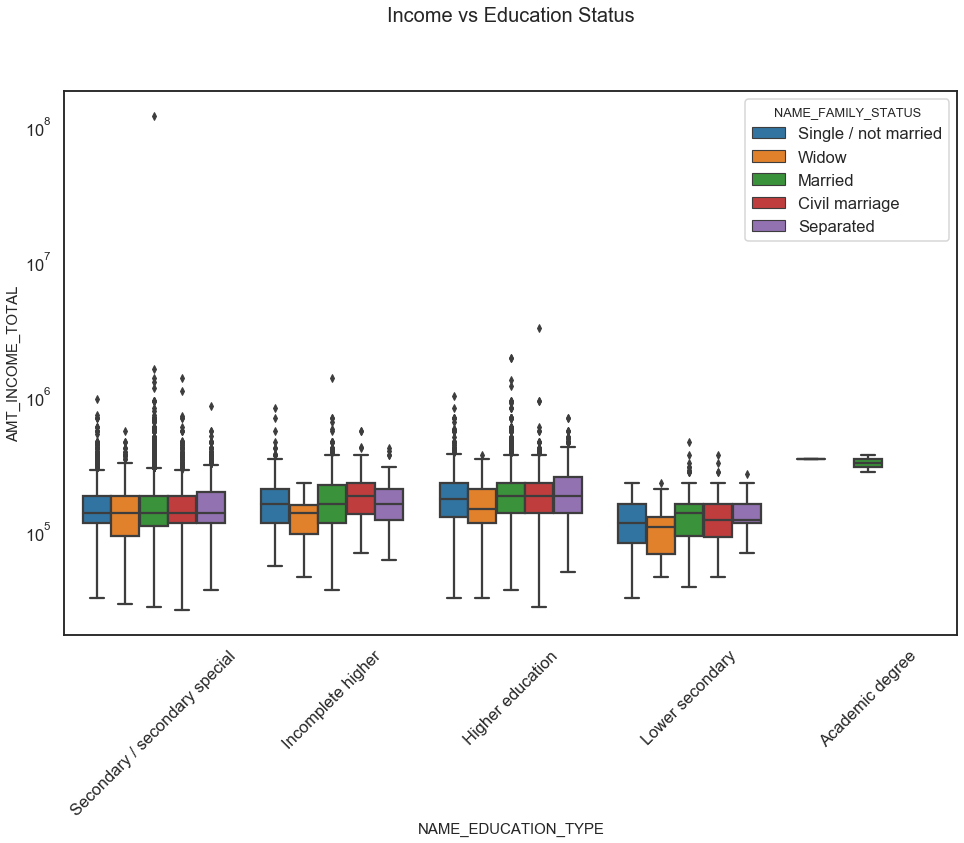

In [72]:
plt.figure(figsize = (16,10))
plt.xticks(rotation = 45)
plt.yscale('log')

sns.boxplot(data = app_t1_df, x = 'NAME_EDUCATION_TYPE', y = 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient = 'v')
plt.title('Income vs Education Status')

plt.show()

Inferences from the above plot:
1. Clients with "Secondary/ secondary special" education have higher income.
2. "Academic degree" education clients have lower income values. and almost all the clients in this education category are "Married".

## ========================================================================

###  Reading dataset: previous_application.csv

The "previous_application.csv" contains the  past loan application data, if any, for the clients who have applied for loans at the current finance company. The objective here is to get new variables for analysis. So let us load, clean and preprocess this data before we merge it with the "application_data.csv" and perform EDA on the combined data.

* ### Subtask: Read previous_application.csv

In [73]:
prev_df = pd.read_csv("previous_application.csv")
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


- ###  Subtask: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [74]:
# Checking shape of the dataframe
prev_df.shape

(1670214, 37)

In [75]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [54]:
#Checking summary of the columns
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Preprocessing the previous application data

In [76]:
# find columns with more than 30% of null values
null_cols = prev_df.isnull().sum()
null_cols = null_cols[null_cols.values > 0.3*(len(null_cols))]
len(null_cols)

15

In [77]:
# Remove the above identified columns

null_cols = list(null_cols.loc[null_cols.values >= 0.30].index)
prev_df.drop(labels = null_cols, axis = 1, inplace = True)

prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_APPLICATION,AMT_CREDIT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.670214e+06,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.923089e+06,2.783572e+05,1.752339e+05,1.961140e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02
std,5.325980e+05,1.028148e+05,2.927798e+05,3.185746e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.461857e+06,1.893290e+05,1.872000e+04,2.416050e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00
50%,1.923110e+06,2.787145e+05,7.104600e+04,8.054100e+04,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00
75%,2.384280e+06,3.675140e+05,1.803600e+05,2.164185e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01
max,2.845382e+06,4.562550e+05,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


# ============================================================

### Merging the two dataframes "application_data.csv" and "previous_application.csv" for further analysis.

* ### Subtask: Merge the two dataframes using the column "SK_ID_CURR"

In [103]:
# Merging the two dataframes

combined_df = pd.merge(app_df, prev_df, how = "left", on = "SK_ID_CURR", suffixes='_x')

Here, we are merging the two dataframes on the column "SK_ID_CURR" (inner join).

In [104]:
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle


* ### Subtask: Inspect the combined dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [105]:
#Checking shape of the dataframe
combined_df.shape

(1430155, 51)

In [106]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 51 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1430155 non-null  object  
 3   CODE_GENDER                  1430155 non-null  object  
 4   FLAG_OWN_CAR                 1430155 non-null  object  
 5   FLAG_OWN_REALTY              1430155 non-null  object  
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_                  1430155 non-null  float64 
 9   AMT_ANNUITY                  1430155 non-null  float64 
 10  NAME_INCOME_TYPE             1430155 non-null  object  
 11  NAME_EDUCATION_TYPE          1430155 non-null  object  
 12  NAME_FAMILY_STATUS          

In [107]:
# Checking summary of columns
combined_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,AMT_APPLICATION,AMT_CREDITx,HOUR_APPR_PROCESS_STARTx,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
count,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,1.430155e+06,...,1.430155e+06,1.430155e+06,1.430155e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784702e+05,8.624240e-02,4.038870e-01,1.736036e+05,5.893386e+05,2.704189e+04,2.079102e-02,-1.631495e+04,6.860209e+04,-5.001275e+03,...,7.368082e-02,2.220151e-01,1.738609e-01,1.922744e+06,1.752436e+05,1.963541e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02
std,1.028021e+05,2.807218e-01,7.165176e-01,1.983303e+05,3.874204e+05,1.403958e+04,1.339810e-02,4.346737e+03,1.451967e+05,3.551626e+03,...,2.612509e-01,4.156014e-01,3.789899e-01,5.327153e+05,2.936222e+05,3.194813e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,2.900000e-04,-2.522900e+04,-1.791200e+04,-2.467200e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00
25%,1.893610e+05,0.000000e+00,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,1.003200e-02,-1.997500e+04,-2.825000e+03,-7.509000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.461346e+06,1.975050e+04,2.488050e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00
50%,2.789560e+05,0.000000e+00,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,1.885000e-02,-1.603700e+04,-1.277000e+03,-4.506000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,1.922698e+06,7.087050e+04,8.059500e+04,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00
75%,3.675090e+05,0.000000e+00,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,2.866300e-02,-1.272950e+04,-2.820000e+02,-1.997000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,2.384012e+06,1.800000e+05,2.156400e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01
max,4.562550e+05,1.000000e+00,1.900000e+01,1.170000e+08,4.050000e+06,2.580255e+05,7.250800e-02,-7.489000e+03,3.652430e+05,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,2.845381e+06,5.850000e+06,4.509688e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06


Of the columns that are present in this combined_df dataframe, let us now drop those columns that are unwanted in our analysis. And consider only the relavant columns.

In [108]:
# Renaming the column names after merging for better readability

merged_df = combined_df.rename({"NAME_CONTRACT_TYPE_":"NAME_CONTRACT_TYPE", "AMT_CREDIT_":"AMT_CREDIT",
                                "WEEKDAY_APPR_PROCESS_START_":"WEEKDAY_APPR_PROCESS_START",
                                "HOUR_APPR_PROCESS_START_":"HOUR_APPR_PROCESS_START",
                                "NAME_CONTRACT_TYPEx":"NAME_CONTRACT_TYPE_PREV", "AMT_CREDITx":"AMT_CREDIT_PREV",
                                "WEEKDAY_APPR_PROCESS_STARTx":"WEEKDAY_APPR_PROCESS_START_PREV",
                                "HOUR_APPR_PROCESS_STARTx":"HOUR_APPR_PROCESS_START_PREV"}, axis = 1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 51 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   SK_ID_CURR                       1430155 non-null  int64   
 1   TARGET                           1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE               1430155 non-null  object  
 3   CODE_GENDER                      1430155 non-null  object  
 4   FLAG_OWN_CAR                     1430155 non-null  object  
 5   FLAG_OWN_REALTY                  1430155 non-null  object  
 6   CNT_CHILDREN                     1430155 non-null  int64   
 7   AMT_INCOME_TOTAL                 1430155 non-null  float64 
 8   AMT_CREDIT                       1430155 non-null  float64 
 9   AMT_ANNUITY                      1430155 non-null  float64 
 10  NAME_INCOME_TYPE                 1430155 non-null  object  
 11  NAME_EDUCATION_TYPE              1430

In [109]:
# Dropping unwanted columns from combined_df dataframe

unwanted_cols = ['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [110]:
merged_df.drop(labels = unwanted_cols, axis=1, inplace=True)

In [111]:
#checking the dataframe after "drop" operation
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 38 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   TARGET                      1430155 non-null  int64   
 1   NAME_CONTRACT_TYPE          1430155 non-null  object  
 2   CODE_GENDER                 1430155 non-null  object  
 3   FLAG_OWN_CAR                1430155 non-null  object  
 4   FLAG_OWN_REALTY             1430155 non-null  object  
 5   CNT_CHILDREN                1430155 non-null  int64   
 6   AMT_INCOME_TOTAL            1430155 non-null  float64 
 7   AMT_CREDIT                  1430155 non-null  float64 
 8   AMT_ANNUITY                 1430155 non-null  float64 
 9   NAME_INCOME_TYPE            1430155 non-null  object  
 10  NAME_EDUCATION_TYPE         1430155 non-null  object  
 11  NAME_FAMILY_STATUS          1430155 non-null  object  
 12  NAME_HOUSING_TYPE           1430155 non-nu

## Univariate Analysis

#### 1. Analysing NAME_CASH_LOAN_PURPOSE

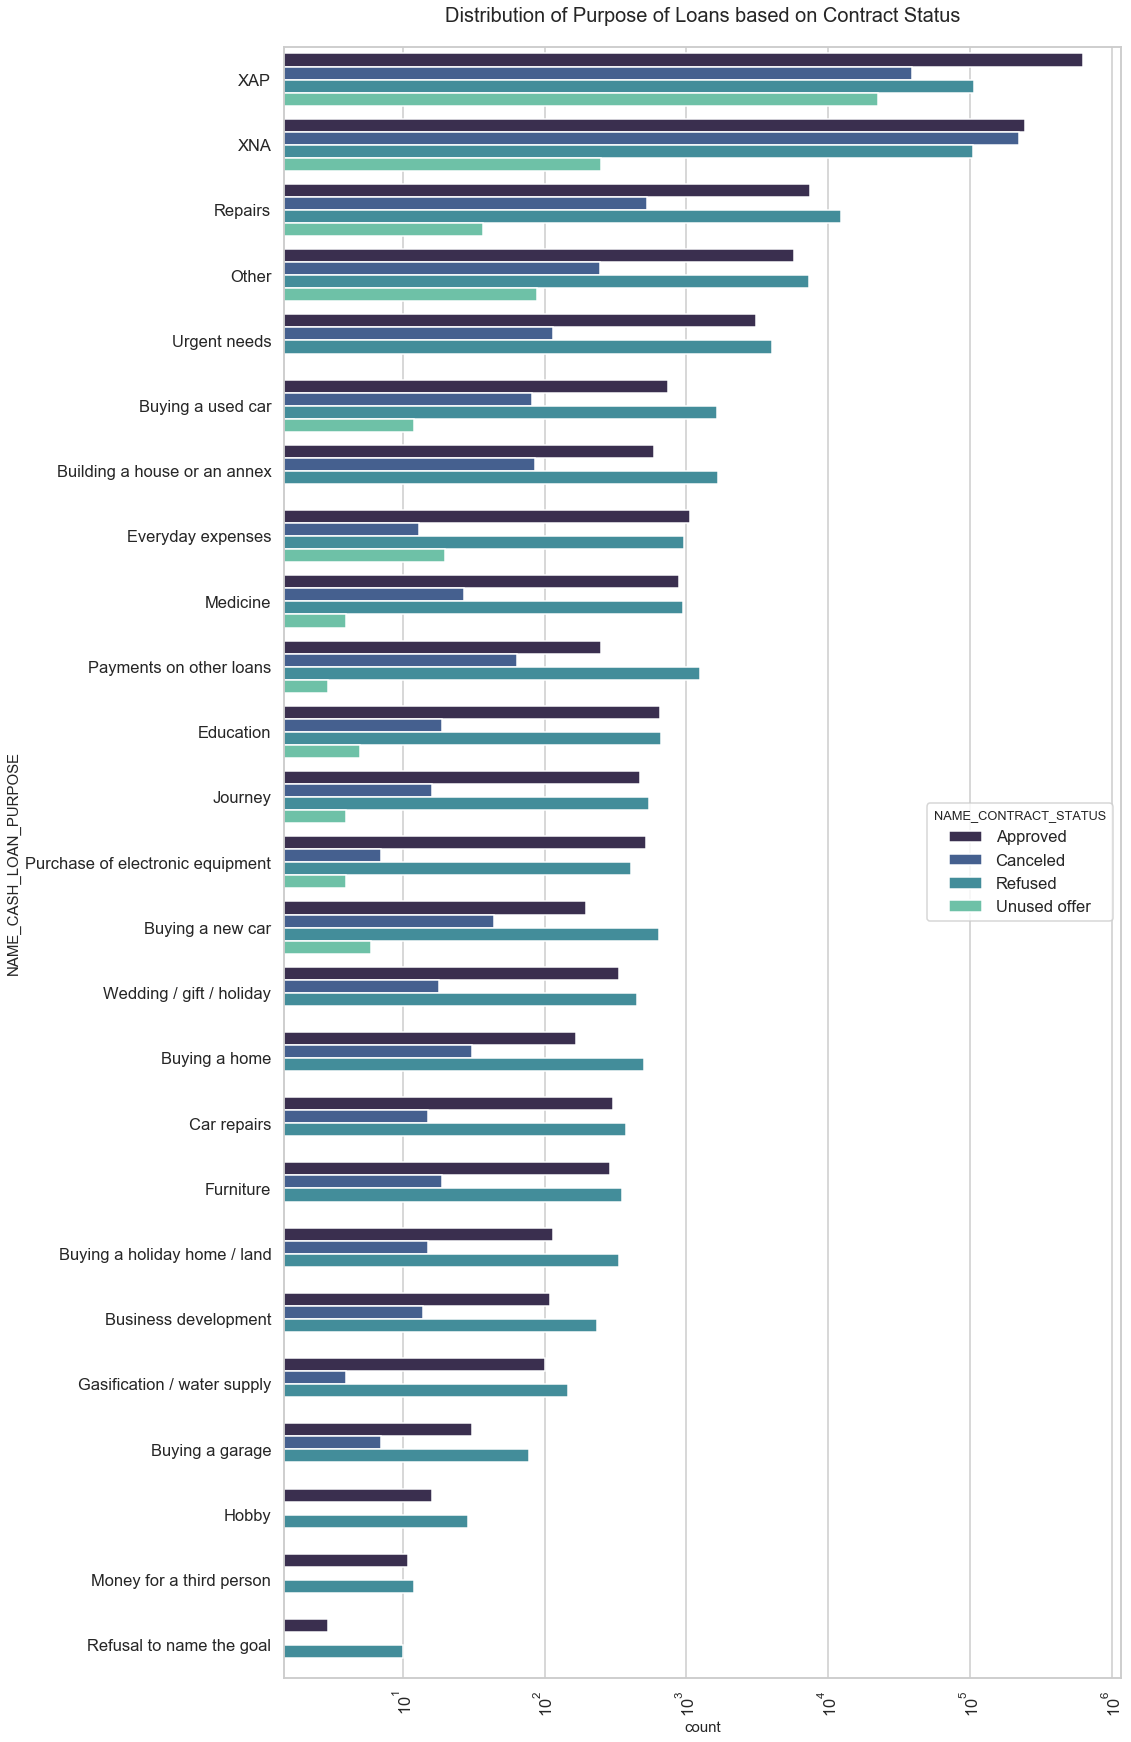

In [113]:
# Distribution of NAME_CASH_LOAN_PURPOSE

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 25
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Purpose of Loans based on Contract Status')
ax = sns.countplot(data = merged_df, y = 'NAME_CASH_LOAN_PURPOSE',
                   order = merged_df.NAME_CASH_LOAN_PURPOSE.value_counts().index,
                   hue = 'NAME_CONTRACT_STATUS', palette = 'mako') 

* *There are values "XNA" and "XAP" in the above data. They are the rows whose values are not available or encoded. In this part of analysis, we are only reporting these values, but not treating them.*

Inferences from the above graph:
- More number of loans are under "Repairs" category and least are under "Refusal to name the goal".
- In "Education" loans, approved and refused loans are same in number.
- Number of approved loans are more, than canceled/refused/unused offer, only for "Everyday expenses" and "Purchase of electronic equipment".
- No loan is cancelled or left as unused offer, for "Hobby", "Money for a third person" and "Refusal to name the goal" categories.
- Loans under categories ""Wedding/gift/holiday", "Buying a home", "Car repairs", "Furniture", "Buying a holiday home/land"," Business development", "Gasification/water supply", "Buying a garage" are never left unused.

#### Distribution of "Loan Purpose" with respect to TARGET

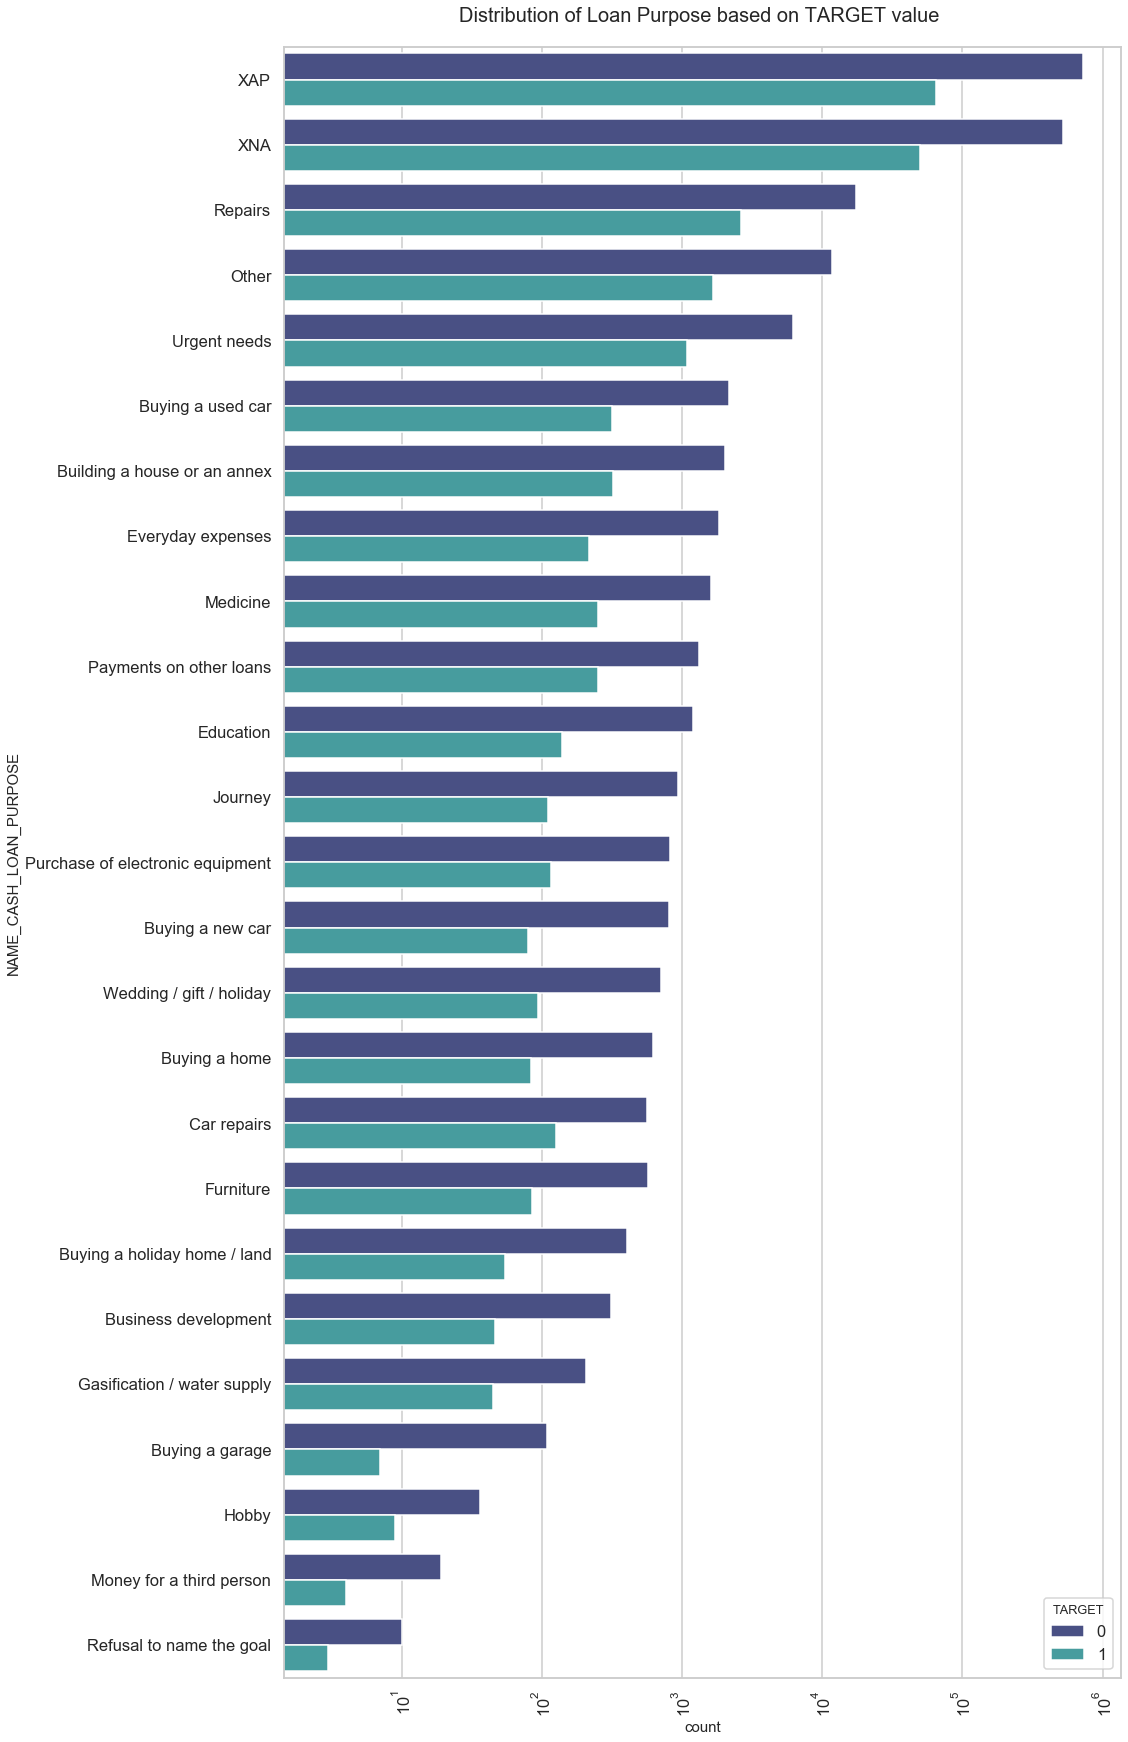

In [120]:
# Plotting 

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 25
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Loan Purpose based on TARGET value ')
ax = sns.countplot(data = merged_df, y = 'NAME_CASH_LOAN_PURPOSE', 
                   order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette='mako') 

Inferences from above plot:
- "Repairs" is the one category of loans where both clients with no payment difficulties and clients with payment difficulties are higher in number.
- And, both clients with no payment difficulties and clients with payment difficulties are lower in number under loan category "Refusal to name the goal".
- 'Buying a garage' is one category of loan where percentage of  clients with no payment difficulties is significantly higher than those facing difficulties in payment. 

*Hence we can focus on those purposes where the client is having lower chances for payment difficulties.*

### Bivariate Analysis

**Analysing Previous Credit Amount" vs "Loan Purpose"**

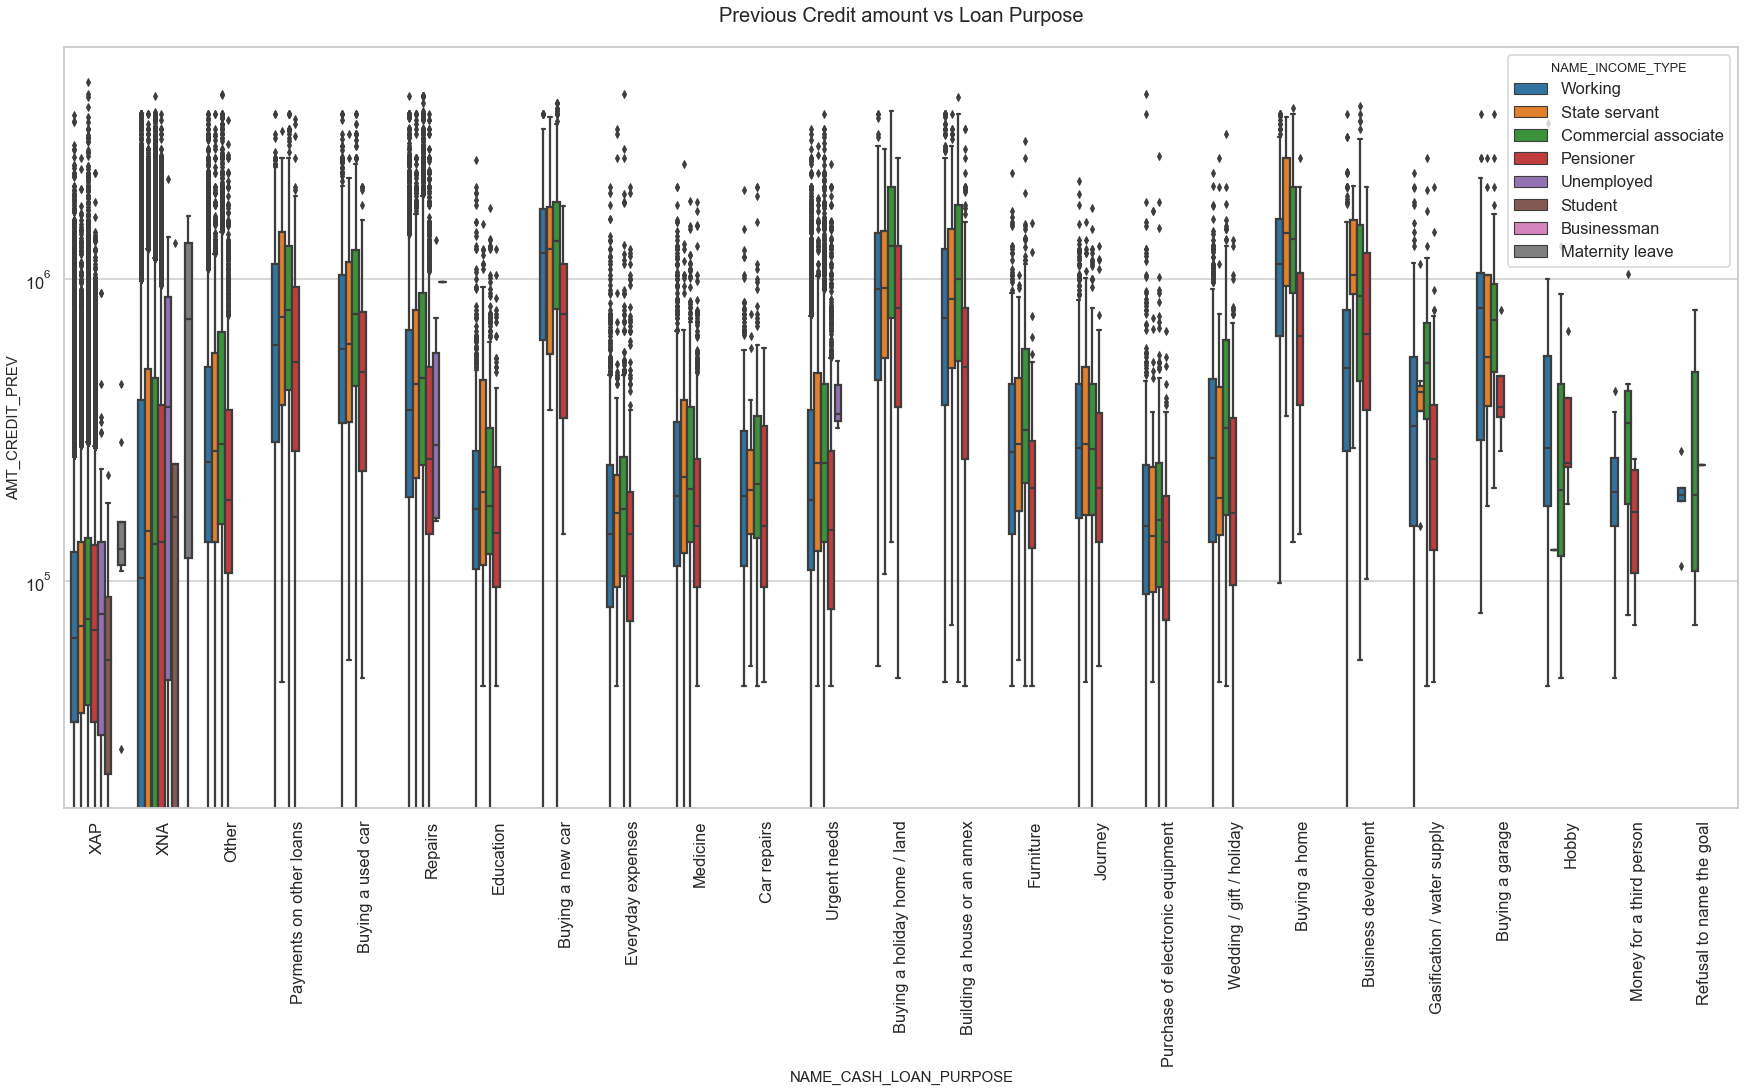

In [133]:
# plotting

plt.figure(figsize=(30,14))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = merged_df, x = 'NAME_CASH_LOAN_PURPOSE', hue = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT_PREV', orient = 'v')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

Inferences from above plot:

1. Loans falling under "Other" category has more number of previous credits.
2. Loans for "Buying a home" have high previous credit amounts.
3. Lower credit values are for Loans taken as "Money for a third person".

*There are values "XNA" and "XAP" in the above data. They are the rows whose values are not available or encoded. In this part of analysis, we are only reporting these values, but not treating them.*

**Analysing Previous Credit Amount vs Housing Tpye**

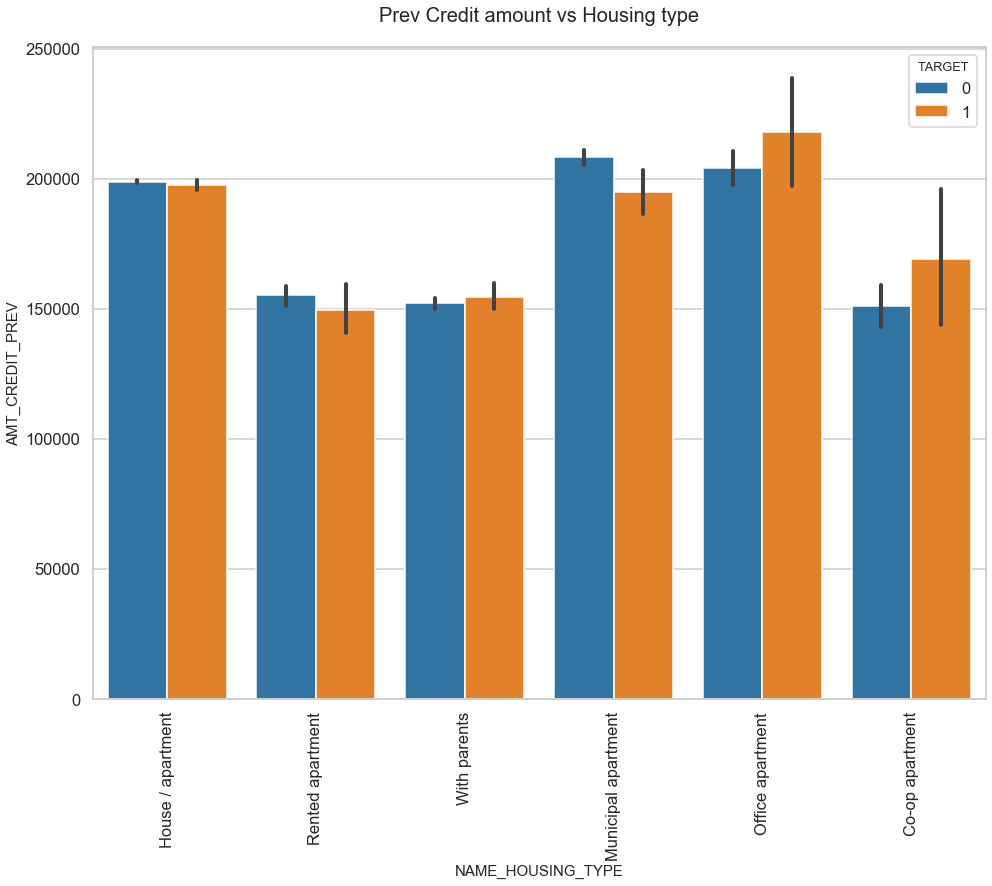

In [135]:
# Box plotting for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merged_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

- Here for Housing type, office appartment is having higher credit of target 1 and municipal apartment is having higher credit of target 0.
- So, we can conclude that bank should avoid giving loans to the housing type of office apartment as they are having difficulties in payment.
- Bank can focus mostly on housing type "Rented apartments" and "Municipal apartment" for successful payments.

# ============================================================

## CONCLUSION

**1. Banks should focus more on loans under "Everyday expenses" and "Purchase of electronic equipment" categories.**

**2. Clients who have taken loans for "Buying a garage" can be targeted as they have lesser  to no payment difficulties.**

**3. More the annual income of the client, more is the loan annuity and lesser is the probability that the client will default the loan.**

**4. Clients with "Secondary/ secondary special" education, and "Working" clients should be targeted as their percent of defaulting a loan is minimum.**

**5. Banks should be more cautious while giving loans to clients with "Academic Degree" as they have lowest percentages of successfully repaying the loans.**

**6. The Loan status is based majorly on Purpose of Loan, Employment Length, Grade, Interest Rate and Term.**